<a href="https://colab.research.google.com/github/MaeveHsu/Mining/blob/main/Team_A_PLUSSSSS_Used_Electronics_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Project - Team APLUSSSSSS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Variables  
__device_brand__: Name of manufacturing brand  
__os__: OS on which the device runs  
__screen_size__: Size of the screen in cm  
__4g__: Whether 4G is available or not  
__5g__: Whether 5G is available or not  
__front_camera_mp__: Resolution of the rear camera in megapixels  
__back_camera_mp__: Resolution of the front camera in megapixels  
__internal_memory__: Amount of internal memory (ROM) in GB  
__ram__: Amount of RAM in GB  
__battery__: Energy capacity of the device battery in mAh  
__weight__: Weight of the device in grams  
__release_year__: Year when the device model was released  
__days_used__: Number of days the used/refurbished device has been used  
__normalized_new_price__: Normalized price of a new device of the same model  
__normalized_used_price (TARGET)__: Normalized price of the used/refurbished device  

# Importing libraries

In [ ]:
pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
pd.options.display.max_columns=None
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, boxcox
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import csv
import psycopg2
import pickle as pk
import matplotlib
from IPython.core.pylabtools import figsize
import scipy
from scipy.stats import percentileofscore

# Dataset outlook

In [ ]:
import pandas as pd
file_name = "/content/drive/MyDrive/used_device_data.csv"
df_data = pd.read_csv(file_name, sep=',', index_col=None)
df_data

device_brand       os  screen_size   4g   5g  rear_camera_mp  \
0           Honor  Android        14.50  yes   no            13.0   
1           Honor  Android        17.30  yes  yes            13.0   
2           Honor  Android        16.69  yes  yes            13.0   
3           Honor  Android        25.50  yes  yes            13.0   
4           Honor  Android        15.32  yes   no            13.0   
...           ...      ...          ...  ...  ...             ...   
3449         Asus  Android        15.34  yes   no             NaN   
3450         Asus  Android        15.24  yes   no            13.0   
3451      Alcatel  Android        15.80  yes   no            13.0   
3452      Alcatel  Android        15.80  yes   no            13.0   
3453      Alcatel  Android        12.83  yes   no            13.0   

      front_camera_mp  internal_memory  ram  battery  weight  release_year  \
0                 5.0             64.0  3.0   3020.0   146.0          2020   
1                16.0            128.0  8.0   4300.0   213.0          2020   
2                 8.0            128.0  8.0   4200.0   213.0          2020   
3                 8.0             64.0  6.0   7250.0   480.0          2020   
4                 8.0             64.0  3.0   5000.0   185.0          2020   
...               ...              ...  ...      ...     ...           ...   
3449              8.0             64.0  6.0   5000.0   190.0          2019   
3450              8.0            128.0  8.0   4000.0   200.0          2018   
3451              5.0             32.0  3.0   4000.0   165.0          2020   
3452              5.0             32.0  2.0   4000.0   160.0          2020   
3453              5.0             16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127               4.307572              4.715100  
1           325               5.162097              5.519018  
2           162               5.111084              5.884631  
3           345               5.135387              5.630961  
4           293               4.389995              4.947837  
...         ...                    ...                   ...  
3449        232               4.492337              6.483872  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994  

[3454 rows x 15 columns]

In [ ]:
# check the size of the dataset
print ("The size of used device dataset :", df_data.shape)

The size of used device dataset : (3454, 15)


In [ ]:
# print the first 2 and the last 2 rows
df_data.head(2).append(df_data.tail(2))

device_brand       os  screen_size   4g   5g  rear_camera_mp  \
0           Honor  Android        14.50  yes   no            13.0   
1           Honor  Android        17.30  yes  yes            13.0   
3452      Alcatel  Android        15.80  yes   no            13.0   
3453      Alcatel  Android        12.83  yes   no            13.0   

      front_camera_mp  internal_memory  ram  battery  weight  release_year  \
0                 5.0             64.0  3.0   3020.0   146.0          2020   
1                16.0            128.0  8.0   4300.0   213.0          2020   
3452              5.0             32.0  2.0   4000.0   160.0          2020   
3453              5.0             16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127               4.307572              4.715100  
1           325               5.162097              5.519018  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

# 然后打印你的dataframe的列名
print(df_data.columns)


Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')


We observed that:
- four catogorical features
- ten numerical features

In [ ]:
df_data.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
rear_camera_mp         3275.0     9.460208     4.815461     0.080000   
front_camera_mp        3452.0     6.554229     6.970372     0.000000   
internal_memory        3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
rear_camera_mp            5.000000     8.000000    13.000000    48.000000  
front_camera_mp           2.000000     5.000000     8.000000    32.000000  
internal_memory          16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

# Handle missing values

In [ ]:
# create a boolean mask for missing values
missing_values_mask = df_data.isna()

# count the number of missing values in each column
missing_values_count = missing_values_mask.sum()

# report the count and locations of missing values
print("Total missing values:")
print(missing_values_count)
print("\nMissing values by column:")
print(df_data.columns[missing_values_mask.any()].tolist())
print(df_data.isna().sum())

Total missing values:
device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Missing values by column:
['rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']
device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_n

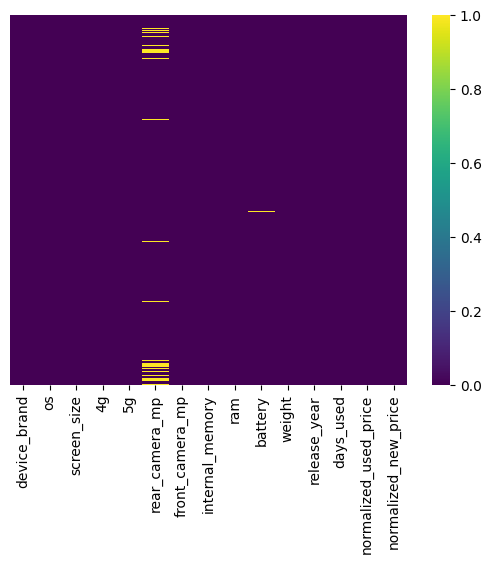

In [ ]:
sns.heatmap(df_data.isnull(),yticklabels=False,cmap='viridis')
plt.show()

In [ ]:
missing_values_columns = df_data.columns[missing_values_mask.any()].tolist()
print(df_data[missing_values_columns])

      rear_camera_mp  front_camera_mp  internal_memory  ram  battery  weight
0               13.0              5.0             64.0  3.0   3020.0   146.0
1               13.0             16.0            128.0  8.0   4300.0   213.0
2               13.0              8.0            128.0  8.0   4200.0   213.0
3               13.0              8.0             64.0  6.0   7250.0   480.0
4               13.0              8.0             64.0  3.0   5000.0   185.0
...              ...              ...              ...  ...      ...     ...
3449             NaN              8.0             64.0  6.0   5000.0   190.0
3450            13.0              8.0            128.0  8.0   4000.0   200.0
3451            13.0              5.0             32.0  3.0   4000.0   165.0
3452            13.0              5.0             32.0  2.0   4000.0   160.0
3453            13.0              5.0             16.0  2.0   4000.0   168.0

[3454 rows x 6 columns]


In [ ]:
# replace missing values with the mean 
df_data[['rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']] = df_data[['rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']].fillna(df_data[['rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']].mean())

if df_data[['rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']].isnull().values.any():
    print("There are still missing values in the DataFrame")
else:
    print("All missing values have been replaced with the mean value of each column")

All missing values have been replaced with the mean value of each column


In [ ]:
#double check
missing_values_count = df_data.isnull().sum().sum()
missing_values_count

0

In [ ]:
df_data.describe()

screen_size  rear_camera_mp  front_camera_mp  internal_memory  \
count  3454.000000     3454.000000      3454.000000      3454.000000   
mean     13.713115        9.460208         6.554229        54.573099   
std       3.805280        4.688986         6.968353        84.923140   
min       5.080000        0.080000         0.000000         0.010000   
25%      12.700000        5.000000         2.000000        16.000000   
50%      12.830000        9.460208         5.000000        32.000000   
75%      15.340000       13.000000         8.000000        64.000000   
max      30.710000       48.000000        32.000000      1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3454.000000  3454.000000  3454.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.364314  1298.553176    88.323566      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

# Checking duplicate values

In [ ]:
df_data.duplicated().sum()

0

# Function to detect outliers

# Encoding categorical features(4G,5G)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_data['4g']=le.fit_transform(df_data['4g'])
df_data['5g']=le.fit_transform(df_data['5g'])

In [ ]:
df_data.head()

device_brand       os  screen_size  4g  5g  rear_camera_mp  front_camera_mp  \
0        Honor  Android        14.50   1   0            13.0              5.0   
1        Honor  Android        17.30   1   1            13.0             16.0   
2        Honor  Android        16.69   1   1            13.0              8.0   
3        Honor  Android        25.50   1   1            13.0              8.0   
4        Honor  Android        15.32   1   0            13.0              8.0   

   internal_memory  ram  battery  weight  release_year  days_used  \
0             64.0  3.0   3020.0   146.0          2020        127   
1            128.0  8.0   4300.0   213.0          2020        325   
2            128.0  8.0   4200.0   213.0          2020        162   
3             64.0  6.0   7250.0   480.0          2020        345   
4             64.0  3.0   5000.0   185.0          2020        293   

   normalized_used_price  normalized_new_price  
0               4.307572              4.715100  
1               5.162097              5.519018  
2               5.111084              5.884631  
3               5.135387              5.630961  
4               4.389995              4.947837

# Exploring some important features

## "Brand" feature:

In [ ]:
len(df_data.device_brand.value_counts())

34

In [ ]:
df_data.device_brand.unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [ ]:
brand_dict = df_data.groupby(['device_brand'])['normalized_used_price'].median().to_dict()
df_data['Device_Brand'] = df_data['device_brand'].map(brand_dict)

In [ ]:
Max_brand = df_data['device_brand'].value_counts().sort_values(ascending=False)
Max_brand.name='Counts'
Max_brand.index.name = 'Brands'

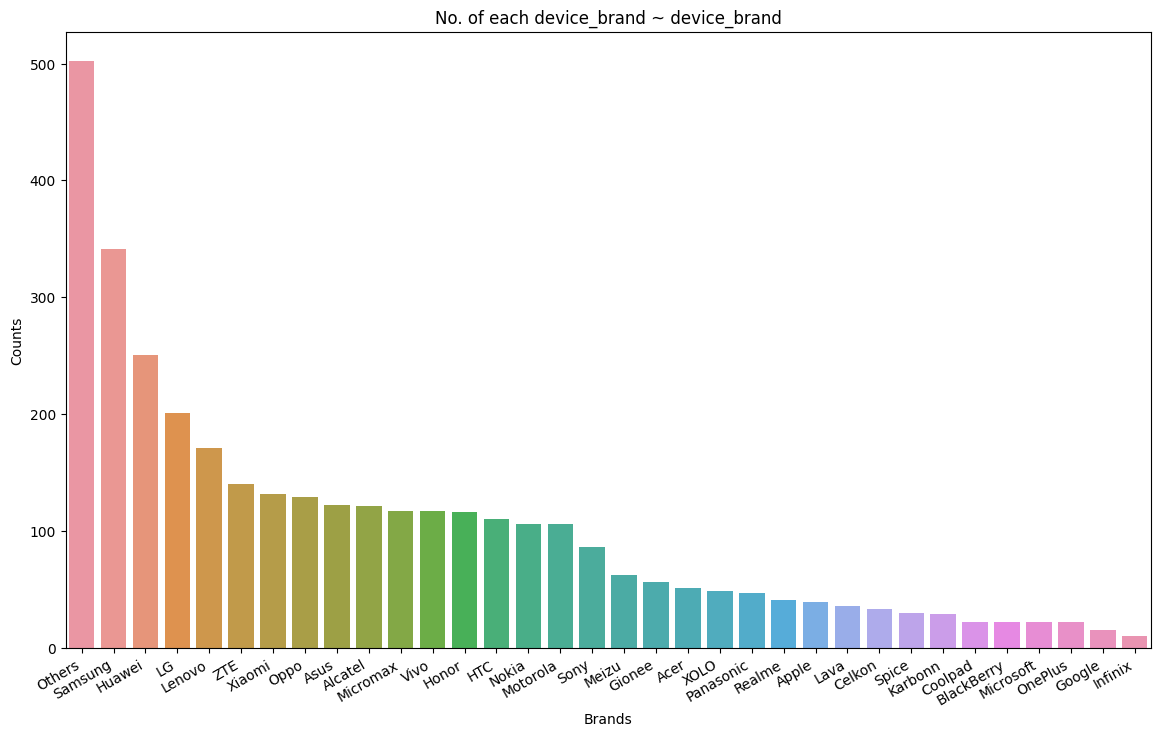

In [ ]:
fig = plt.figure(figsize=(14,8))
ax=sns.barplot(x=Max_brand.index,y= Max_brand)
ax.set_xticklabels(Max_brand.index,rotation=30,ha='right')
plt.title('No. of each device_brand ~ device_brand')
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'),
  Text(33, 0, 'XOLO')])

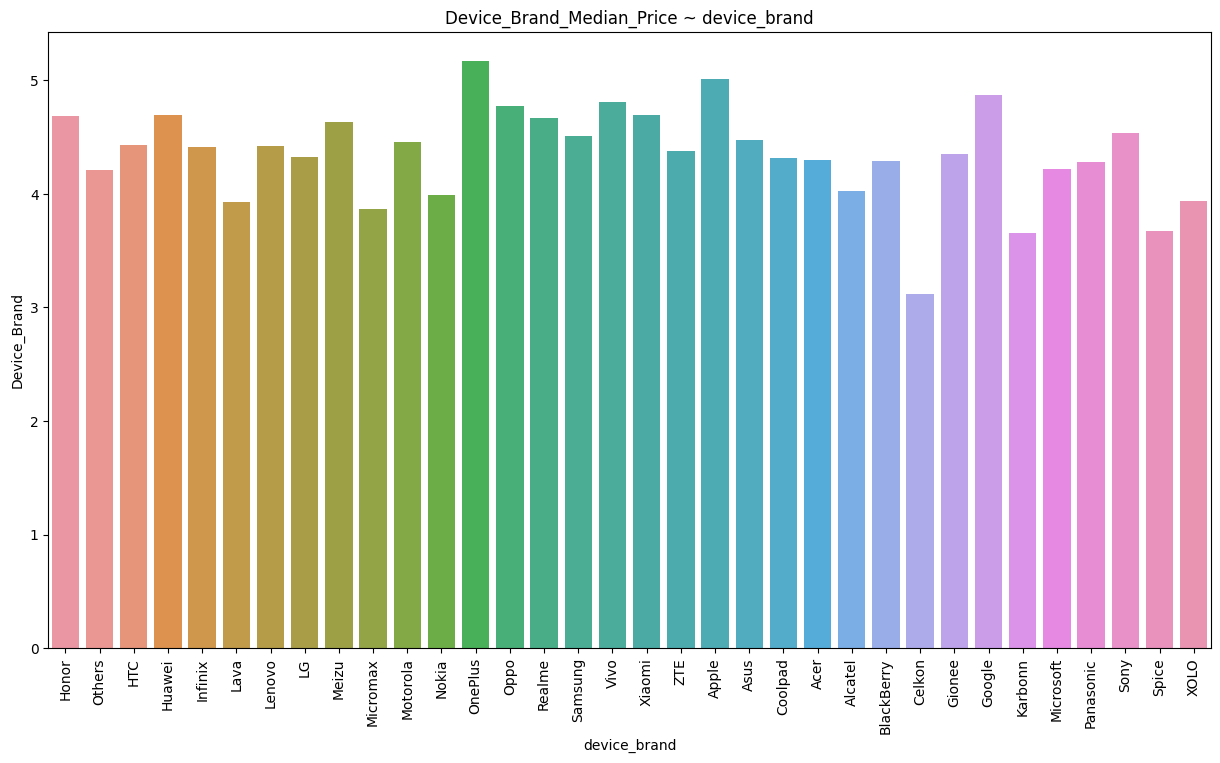

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.barplot(y=df_data['Device_Brand'],x=df_data['device_brand'])
plt.title('Device_Brand_Median_Price ~ device_brand')
plt.xticks(rotation=90)

## "OS" feature:

In [ ]:
df_data.os.value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

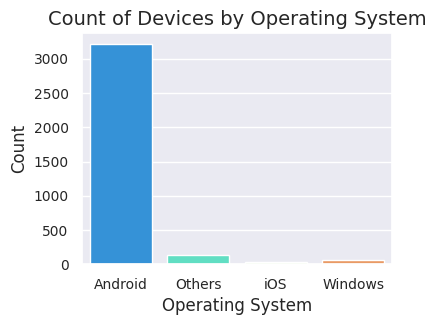

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(4, 3))
ax = sns.countplot(x="os", data=df_data, palette='rainbow')
plt.title("Count of Devices by Operating System", fontsize=14)
plt.xlabel("Operating System", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

- Android phones are highest in number

## "5G" feature:

In [ ]:
df_data['5g'].value_counts()

0    3302
1     152
Name: 5g, dtype: int64

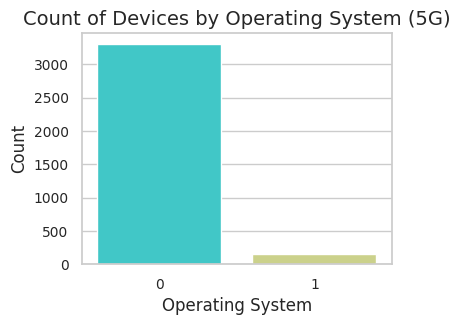

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(4, 3))
ax = sns.countplot(x="5g", data=df_data, palette='rainbow')
plt.title("Count of Devices by Operating System (5G)", fontsize=14)
plt.xlabel("Operating System", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

-  0 represents not 5G phone
-  1 represents 5G phone
-  There are fewer 5g phones

## "4G" feature:

In [ ]:
df_data['4g'].value_counts()

1    2335
0    1119
Name: 4g, dtype: int64

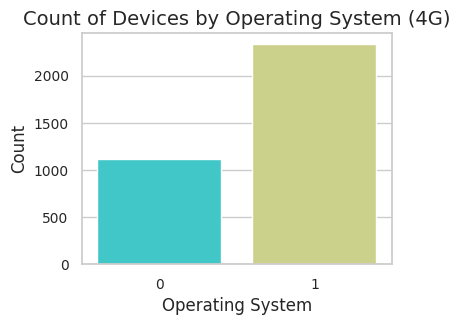

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(4, 3))
ax = sns.countplot(x="4g", data=df_data, palette='rainbow')
plt.title("Count of Devices by Operating System (4G)", fontsize=14)
plt.xlabel("Operating System", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

-  0 represents not 4G phone
-  1 represents 4G phone
-  There are more 4G phones

## "RAM" feature:

In [ ]:
df_data['ram'].value_counts()

4.000000     2815
6.000000      154
8.000000      130
2.000000       90
0.250000       83
3.000000       81
1.000000       34
12.000000      18
0.020000       18
0.030000       17
0.500000        9
4.036122        4
1.500000        1
Name: ram, dtype: int64

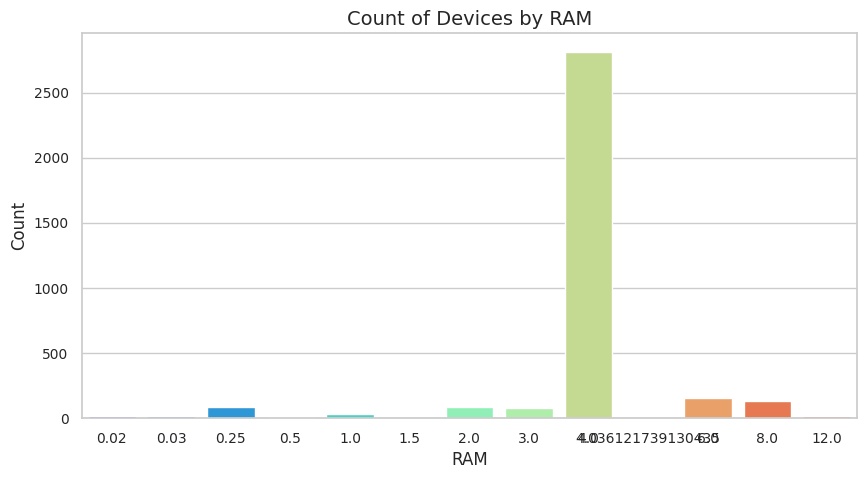

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="ram", data=df_data, palette='rainbow')
plt.title("Count of Devices by RAM", fontsize=14)
plt.xlabel("RAM", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

- Most phones have 4GB Ram

## "release_year" feature:

In [ ]:
df_data['release_year'].value_counts()

2014    642
2013    570
2015    515
2019    446
2016    383
2018    322
2017    299
2020    277
Name: release_year, dtype: int64

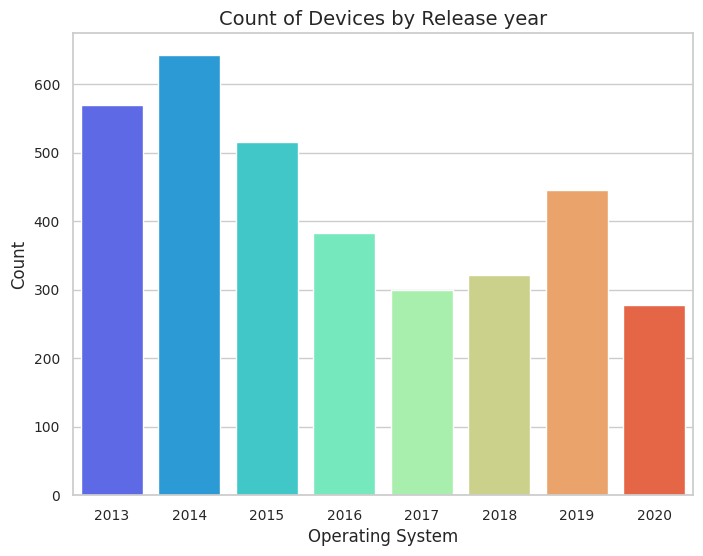

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x="release_year", data=df_data, palette='rainbow')
plt.title("Count of Devices by Release year", fontsize=14)
plt.xlabel("Operating System", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

- Most phones were released in the year 2014

## "internal_memory" feature:

In [ ]:
df_data['internal_memory'].value_counts()

16.000000      1283
32.000000      1083
64.000000       509
128.000000      372
256.000000       86
512.000000       44
0.060000         18
0.100000         17
8.000000         12
4.000000         10
1024.000000       8
0.500000          4
54.573099         4
0.200000          2
24.000000         1
0.010000          1
Name: internal_memory, dtype: int64

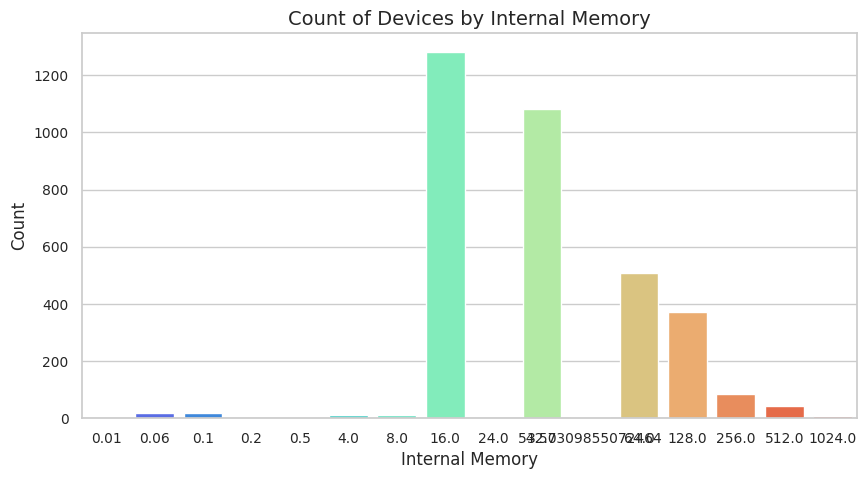

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="internal_memory", data=df_data, palette='rainbow')
plt.title("Count of Devices by Internal Memory", fontsize=14)
plt.xlabel("Internal Memory", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Relation between target variable (price) and categorical features

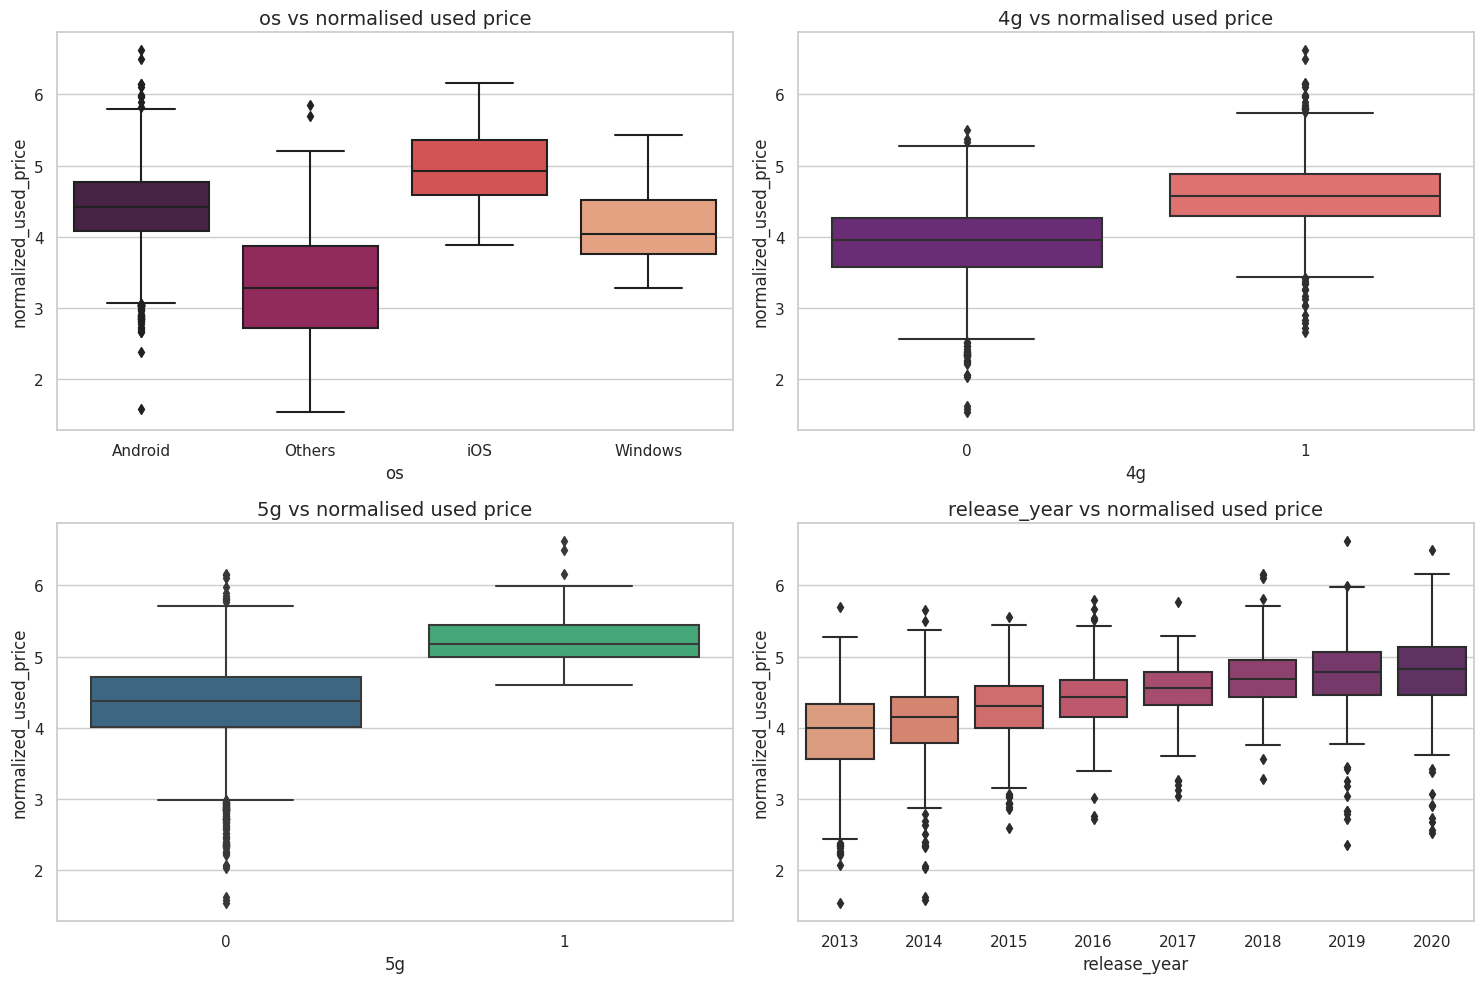

In [ ]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x='os', y='normalized_used_price', data=df_data, ax=ax[0, 0], palette='rocket')
ax[0, 0].set_title('os vs normalised used price', fontsize=14)

sns.boxplot(x='4g', y='normalized_used_price', data=df_data, ax=ax[0, 1], palette='magma')
ax[0, 1].set_title('4g vs normalised used price', fontsize=14)

sns.boxplot(x='5g', y='normalized_used_price', data=df_data, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('5g vs normalised used price', fontsize=14)

sns.boxplot(x='release_year', y='normalized_used_price', data=df_data, ax=ax[1, 1], palette='flare')
ax[1, 1].set_title('release_year vs normalised used price', fontsize=14)

plt.tight_layout()
plt.show()

### Through above boxplots we conclude that :
- phones with os as IOS are priced higher than phones with other os
- 5G enabled phones are priced higher
- 4G enabled phones are priced higher
- Phones from recent years are priced higher than phones from previous years

# Checking distribution of data

In [ ]:
numerical_features = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','normalized_new_price', 'normalized_used_price']
numerical_features

['screen_size',
 'rear_camera_mp',
 'front_camera_mp',
 'battery',
 'weight',
 'days_used',
 'normalized_new_price',
 'normalized_used_price']

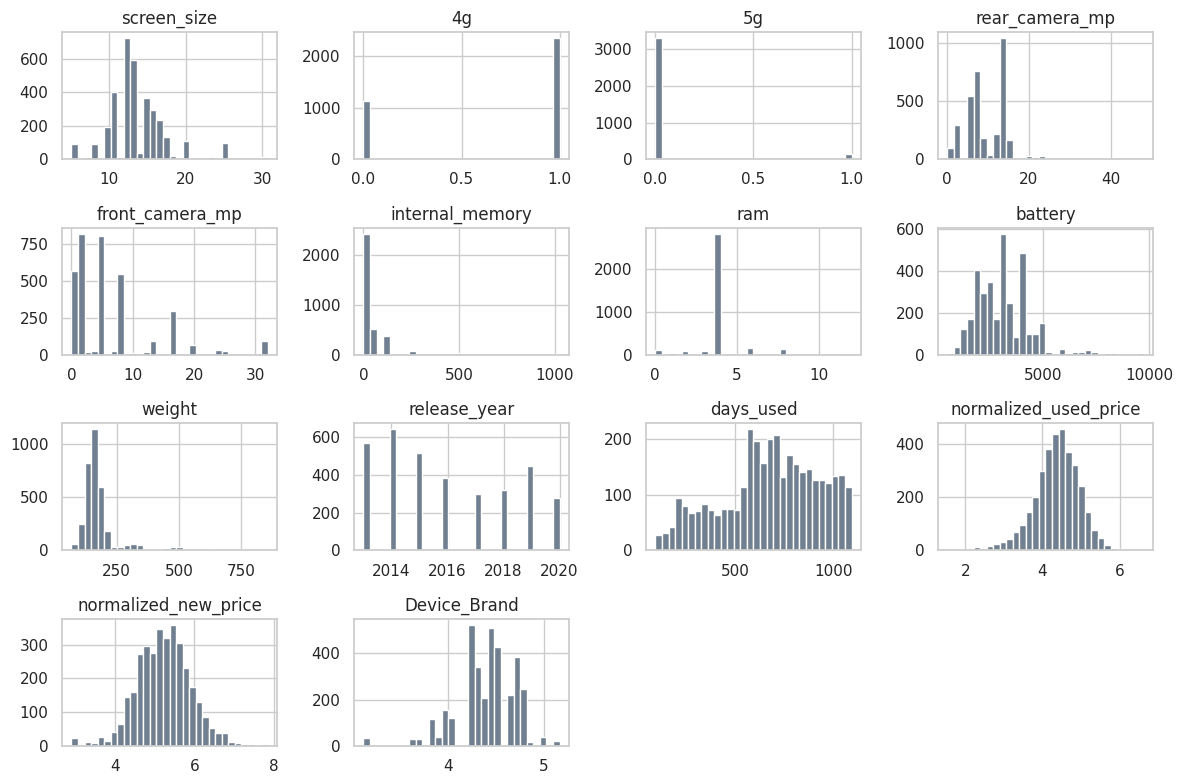

In [ ]:
df_data.hist(figsize=(12,8),bins=30,color='slategray')
plt.tight_layout()

## Function to visualize relationship between target variable and numerical features

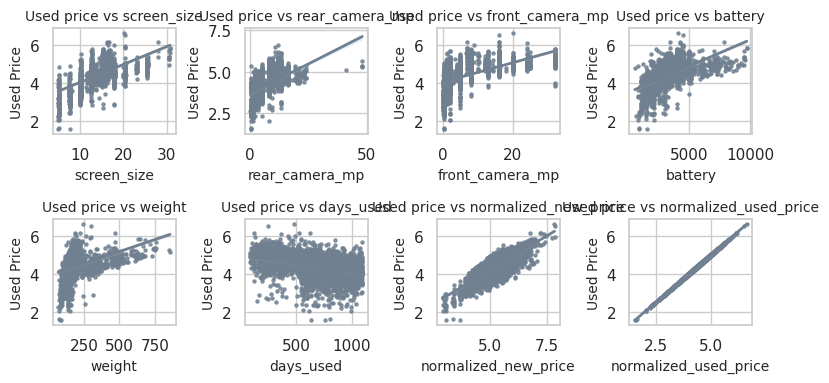

In [ ]:
def bivariate_analysis(x, ax):
    sns.regplot(x=x, y='normalized_used_price', data=df_data, ax=ax, color='slategray',
                scatter_kws={"s": 5}, line_kws={"lw": 2})
    ax.set_title("Used price vs "+x, fontsize=10)
    ax.set_xlabel(x, fontsize=10)
    ax.set_ylabel('Used Price', fontsize=10)
    ax.locator_params(axis='both')


numerical_features = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','normalized_new_price', 'normalized_used_price']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
for i, feature in enumerate(numerical_features):
    row = i // 4  # calculate row position
    col = i % 4  # calculate column position
    bivariate_analysis(feature, axs[row, col])

plt.tight_layout()
plt.show()



# Multivariate Analysis

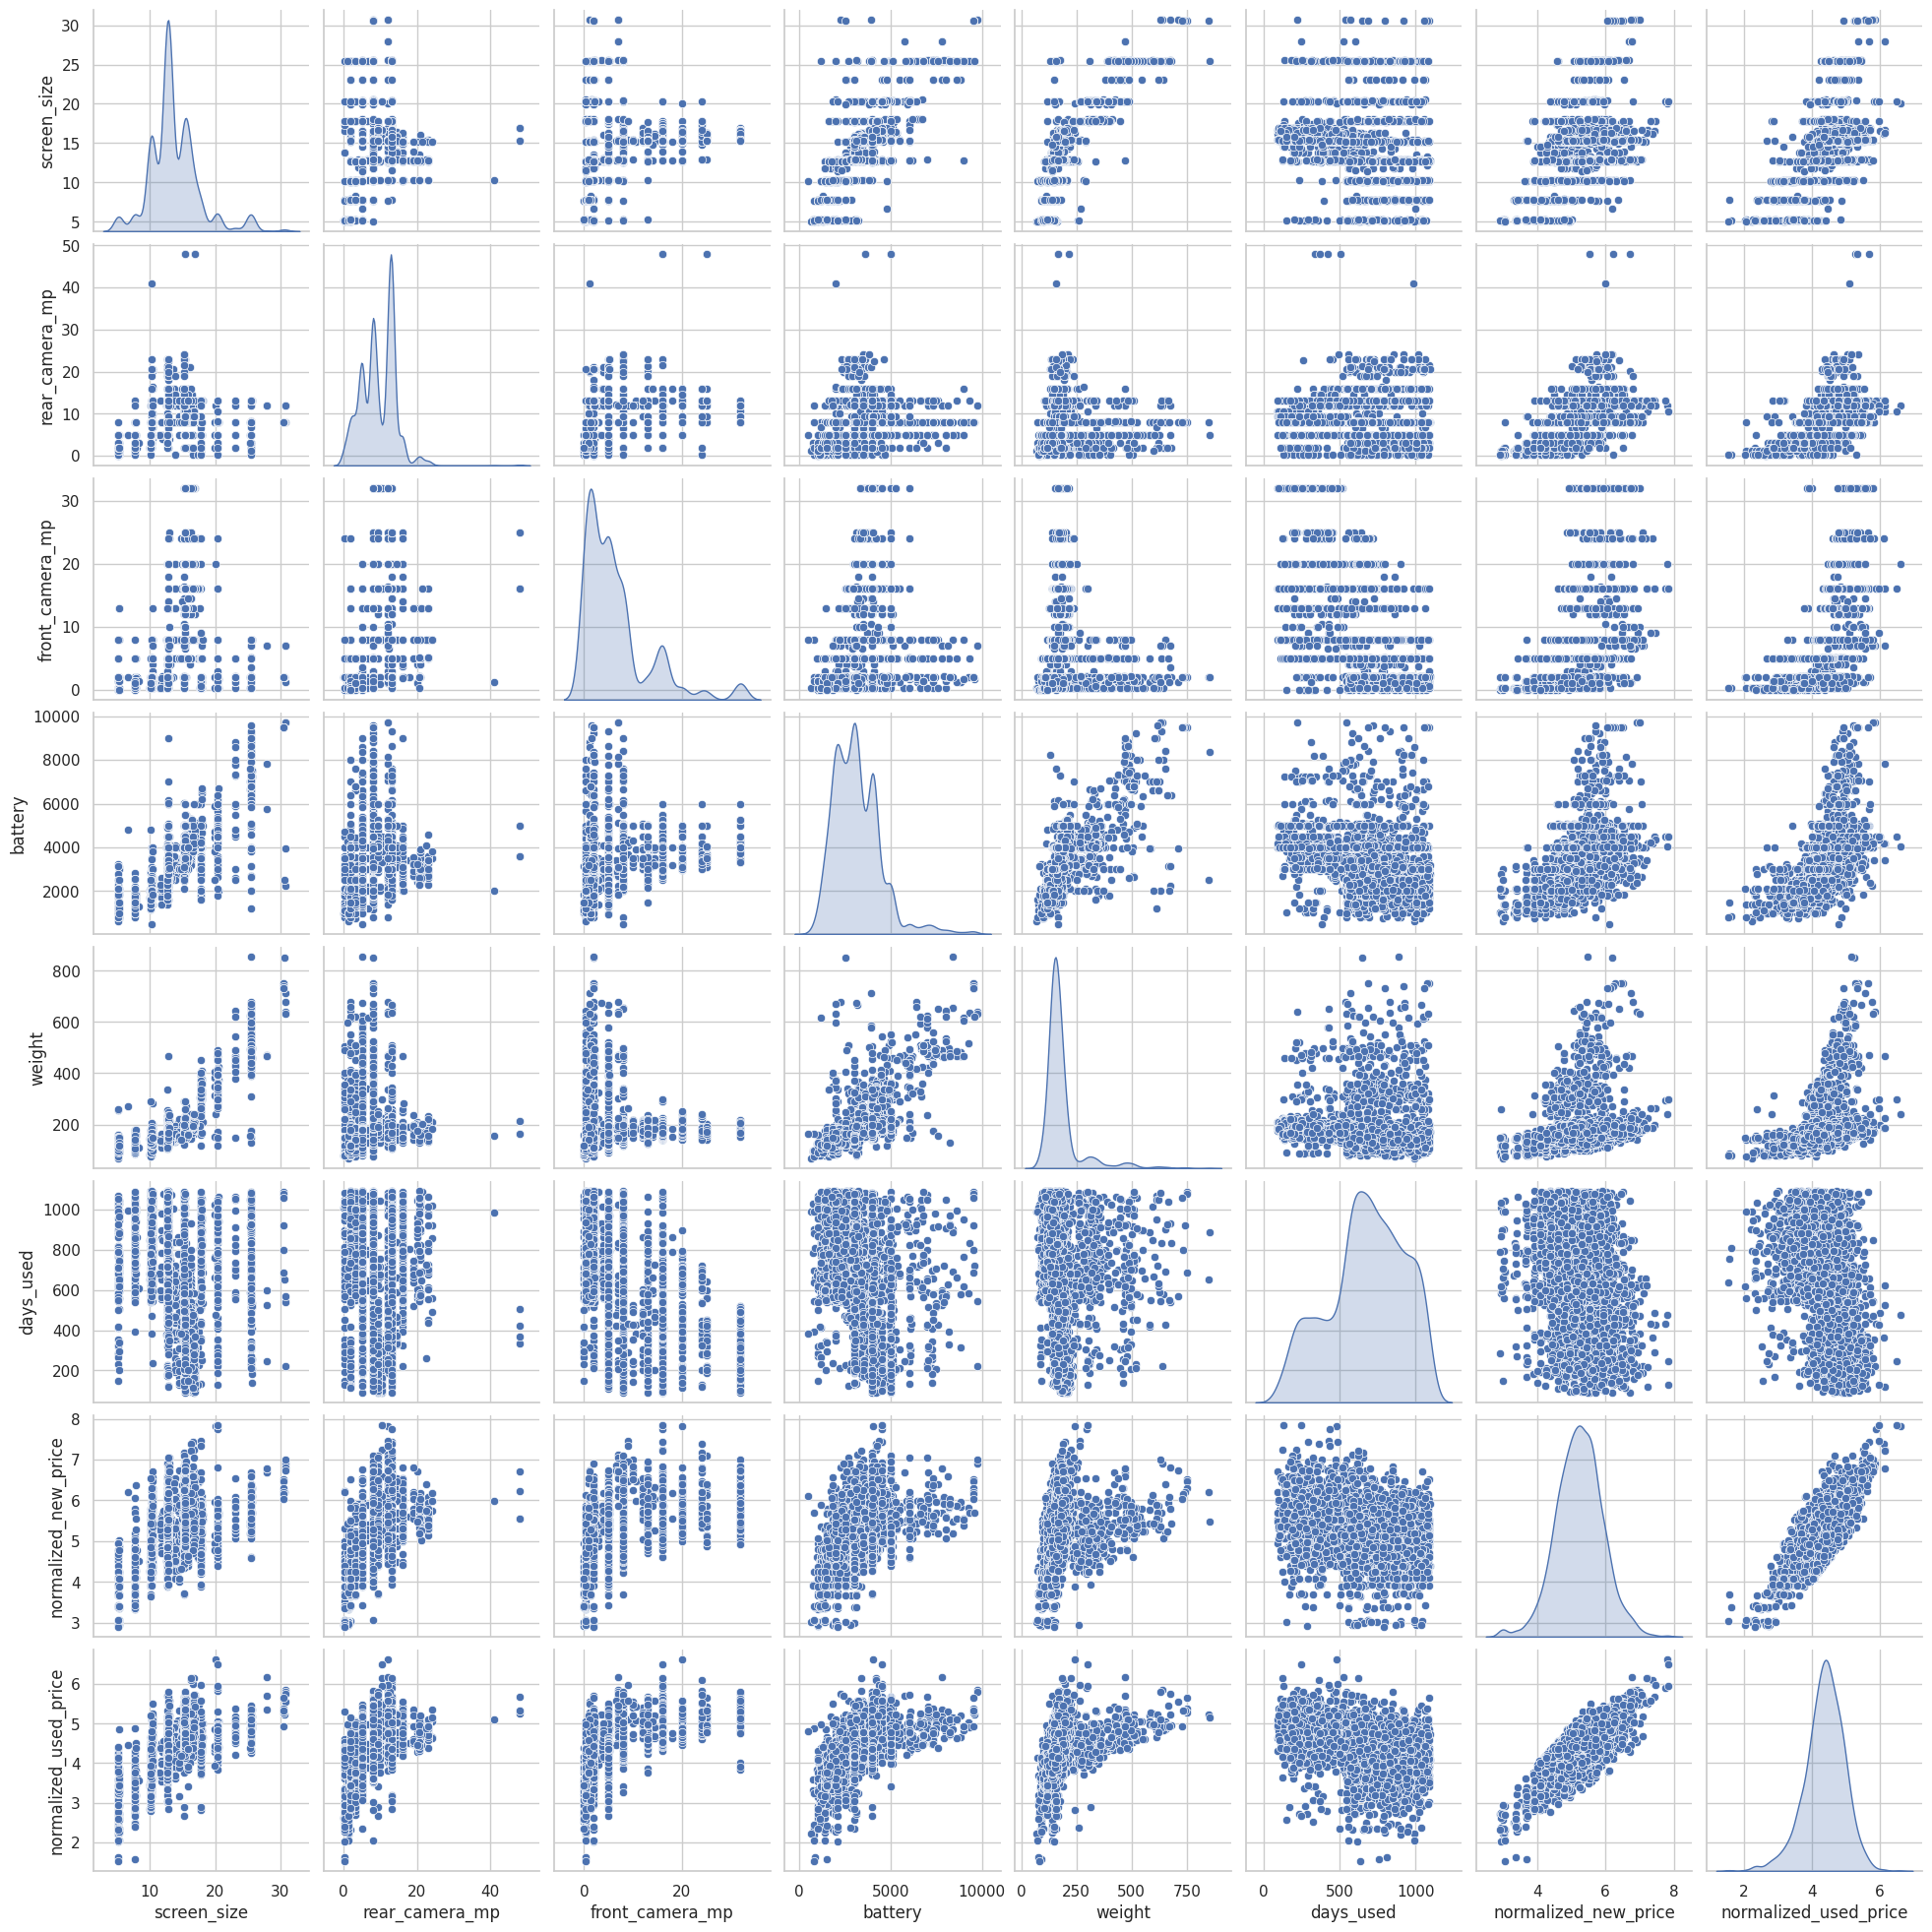

In [ ]:
sns.pairplot(df_data[numerical_features],diag_kind='kde')
plt.show()

# Heatmap

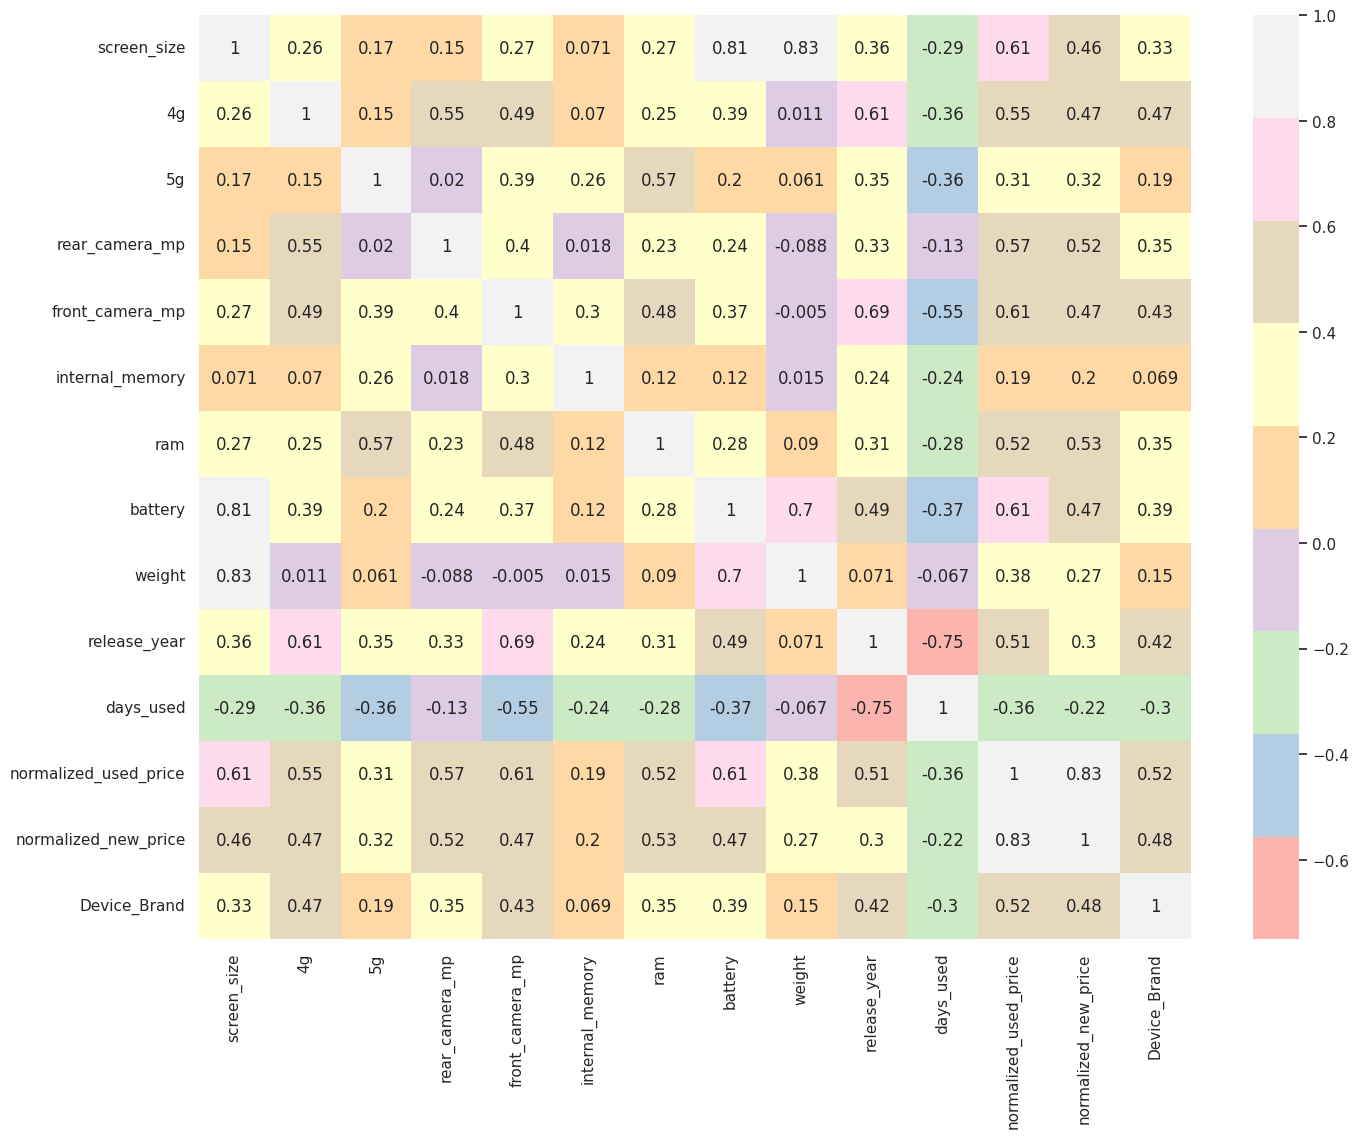

In [ ]:
fig = plt.figure(figsize=(16,12))
sns.heatmap(df_data.corr(),annot=True, cmap='Pastel1')
plt.savefig('/content/drive/MyDrive/heatmap.png')
plt.show()


# Relation between Y and Features  
- __Used Price__ has the highest <font color=green>__positive__</font> correlation with __New Price__, followed by __front camera__ and __battery__. Then, __screen size__, __rear camera__ and __4G__.
- __Used Price__ has the highest <font color=red>__negative__</font> correlation with __Days Used__.  

## Checking Outliers

In [ ]:
cols=['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','normalized_new_price','normalized_used_price']

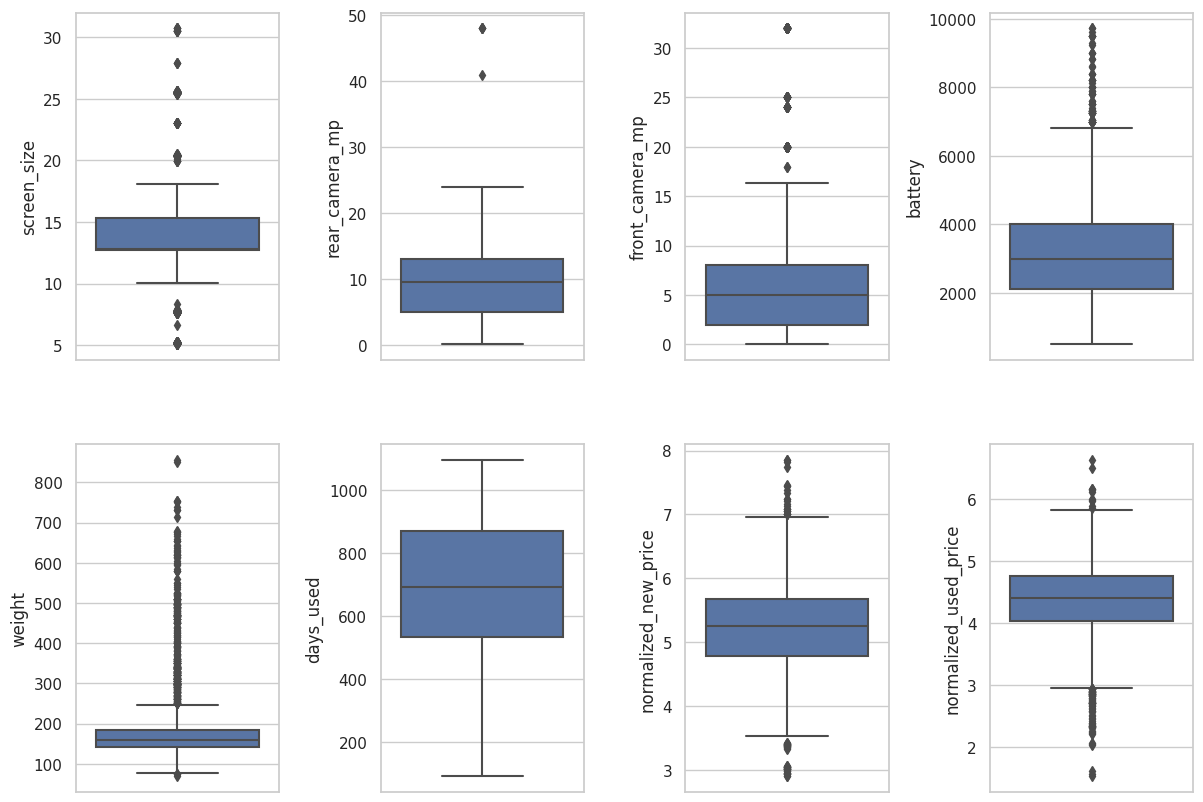

In [ ]:
fig,ax=plt.subplots(2,4,figsize=(12,8))
index=0
ax=ax.flatten()
for col in cols:
    sns.boxplot(y=col,data=df_data,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=1, h_pad=5.0)

**oboservations:**
- Posiible features with outliners:
- rear_camera_rmp
- battery
- weight

In [ ]:
def detect_outliers(column):
    outlier_indices=[]
    
    for col in column:
        #1st quartile
        Q1=np.percentile(df_data[col],25)
        
        #3rd quartile
        Q3=np.percentile(df_data[col],75)

        IQR=Q3-Q1
        outlier_step=IQR*1.5
        #detect outlier and indices
        outlier_list_col=df_data[(df_data[col] < Q1 - outlier_step)
                              | (df_data[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        return outlier_indices
    
len(detect_outliers(cols))

450

__450__ outliers found _!_

# Dropping Outliers

In [ ]:
len(detect_outliers(cols))
df_data = df_data.drop(detect_outliers(cols),axis = 0).reset_index(drop = True)
df_data.shape

(3004, 16)

In [ ]:
df_data

device_brand       os  screen_size  4g  5g  rear_camera_mp  \
0           Honor  Android        14.50   1   0       13.000000   
1           Honor  Android        17.30   1   1       13.000000   
2           Honor  Android        16.69   1   1       13.000000   
3           Honor  Android        15.32   1   0       13.000000   
4           Honor  Android        16.23   1   0       13.000000   
...           ...      ...          ...  ..  ..             ...   
2999         Asus  Android        15.34   1   0        9.460208   
3000         Asus  Android        15.24   1   0       13.000000   
3001      Alcatel  Android        15.80   1   0       13.000000   
3002      Alcatel  Android        15.80   1   0       13.000000   
3003      Alcatel  Android        12.83   1   0       13.000000   

      front_camera_mp  internal_memory  ram  battery  weight  release_year  \
0                 5.0             64.0  3.0   3020.0   146.0          2020   
1                16.0            128.0  8.0   4300.0   213.0          2020   
2                 8.0            128.0  8.0   4200.0   213.0          2020   
3                 8.0             64.0  3.0   5000.0   185.0          2020   
4                 8.0             64.0  4.0   4000.0   176.0          2020   
...               ...              ...  ...      ...     ...           ...   
2999              8.0             64.0  6.0   5000.0   190.0          2019   
3000              8.0            128.0  8.0   4000.0   200.0          2018   
3001              5.0             32.0  3.0   4000.0   165.0          2020   
3002              5.0             32.0  2.0   4000.0   160.0          2020   
3003              5.0             16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  Device_Brand  
0           127               4.307572              4.715100      4.683326  
1           325               5.162097              5.519018      4.683326  
2           162               5.111084              5.884631      4.683326  
3           293               4.389995              4.947837      4.683326  
4           223               4.413889              5.060694      4.683326  
...         ...                    ...                   ...           ...  
2999        232               4.492337              6.483872      4.472036  
3000        541               5.037732              6.251538      4.472036  
3001        201               4.357350              4.528829      4.026423  
3002        149               4.349762              4.624188      4.026423  
3003        176               4.132122              4.279994      4.026423  

[3004 rows x 16 columns]

# Checking skewness of data

In [ ]:
def check_skweness(columnName):
    print('''Before Correcting''')
    try:
        (mu, sigma) = norm.fit(df_data[columnName])
    except RuntimeError:
        (mu,sigma) = norm.fit(df_data[columnName].dropna())
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(8,2))
    plt.subplot(1,2,1)
    sns.distplot(df_data[columnName], fit=norm, color="crimson")
    plt.title(columnName.upper() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(df_data[columnName], plot=plt)
    plt.show()

Before Correcting
Mu before correcting SCREEN_SIZE : 13.38651464713715, Sigma before correcting SCREEN_SIZE : 2.1759903088829935


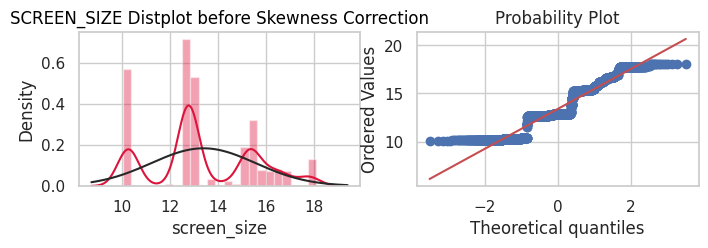

Before Correcting
Mu before correcting REAR_CAMERA_MP : 10.145331946209126, Sigma before correcting REAR_CAMERA_MP : 4.450079767785743


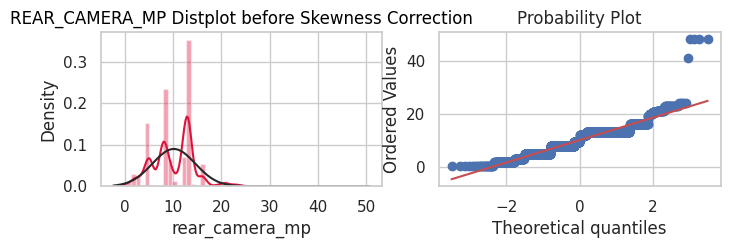

Before Correcting
Mu before correcting FRONT_CAMERA_MP : 7.172123321858997, Sigma before correcting FRONT_CAMERA_MP : 7.180578998109433


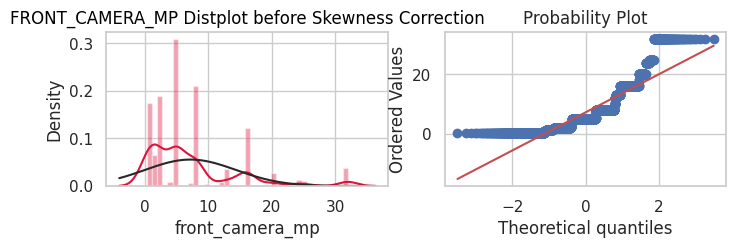

Before Correcting
Mu before correcting BATTERY : 3027.6794967016135, Sigma before correcting BATTERY : 959.1242034025188


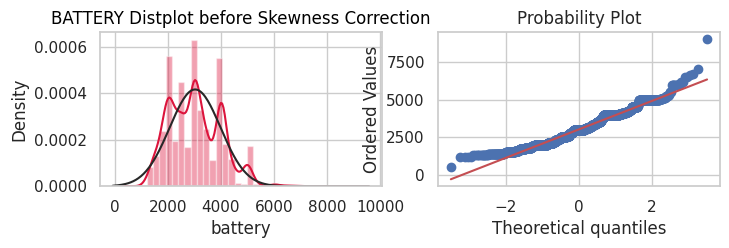

Before Correcting
Mu before correcting WEIGHT : 166.42726800877045, Sigma before correcting WEIGHT : 40.31608718278776


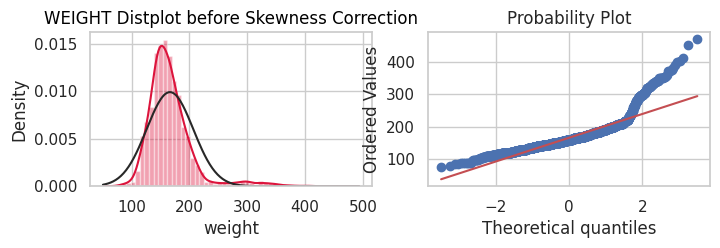

Before Correcting
Mu before correcting DAYS_USED : 668.1577896138482, Sigma before correcting DAYS_USED : 250.82101883863854


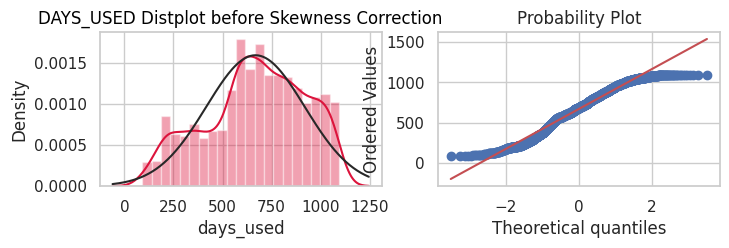

In [ ]:
skew_check_cols = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used']
for columns in skew_check_cols:
    check_skweness(columns)

# Function to apply different tranformations on variables to get normalized data

In [ ]:
def trying_different_transformations(column,transformation):
    if transformation=='boxcox':
        try:
            print("BoxCox - "+column)
            temp,temp_params = boxcox(df_data[column]+1)
            (mu,sigma)=norm.fit(temp)
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(8,2))
            plt.subplot(1,2,1)
            sns.distplot(temp, fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(temp, plot = plt)
        except ValueError:
            pass
        except ValueError:
            pass
    elif transformation=='log':
        try:
            print("Log - "+column)
            (mu,sigma)=norm.fit(np.log1p(df_data[column]))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(8,2))
            plt.subplot(1,2,1)
            sns.distplot(np.log1p(df_data[column]), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(np.log1p(df_data[column]), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    elif transformation=='reciprocal':
        try:
            print("Reciprocal - "+column)
            temp_r = 1/df_data[column]
            temp_r = temp_r.replace([np.inf, -np.inf], 0)
            (mu,sigma)=norm.fit(temp_r)
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(8,2))
            plt.subplot(1,2,1)
            sns.distplot(temp_r, fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(temp_r, plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    elif transformation=='sqroot':
        try:
            print("Square_Root - "+column)
            (mu,sigma)=norm.fit(df_data[column]**(1/2))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(8,2))
            plt.subplot(1,2,1)
            sns.distplot(df_data[column]**(1/2), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(df_data[column]**(1/2), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    else:
        try:
            print("Exponential - "+column)
            (mu,sigma)=norm.fit(df_data[column]**(1/1.2))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(8,2))
            plt.subplot(1,2,1)
            sns.distplot(df_data[column]**(1/1.2), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(df_data[column]**(1/1.2), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass

__Transformations:__
- __Boxcox__
- __Log__
- __Reciprocal__
- __Squareroot__
- __Exponential__

## Trying different transformations on screen_size feature

BoxCox - screen_size
mu  3.3206242652114226  sigma  0.23339223297510456
Log - screen_size
mu  2.654815834998905  sigma  0.15180763242056253
Reciprocal - screen_size
mu  0.07672098475973312  sigma  0.012610838537841368
Square_Root - screen_size
mu  3.6466679855703905  sigma  0.29719900765840435
Exponential - screen_size
mu  8.67147798586576  sigma  1.175694257030674


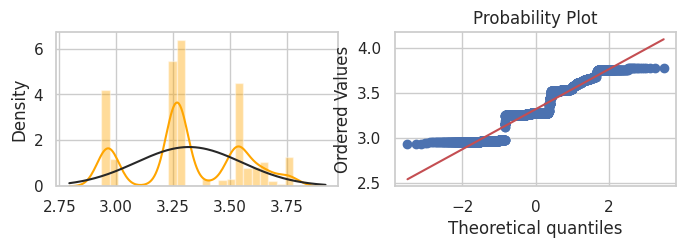

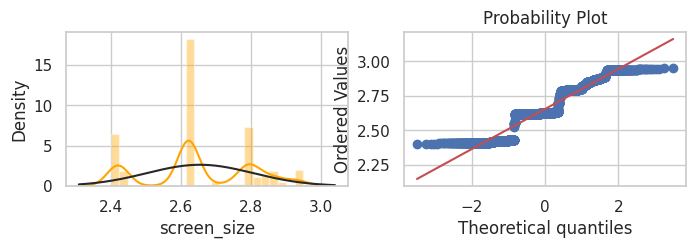

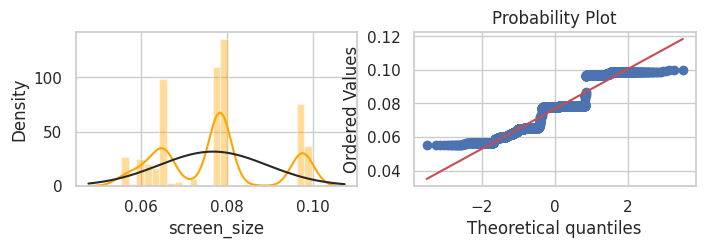

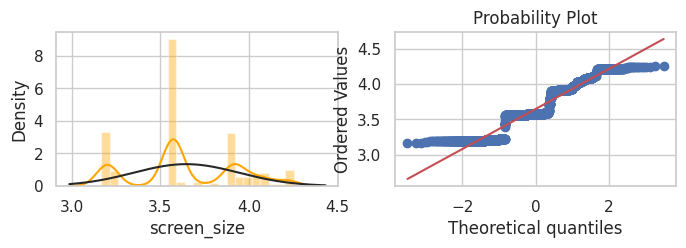

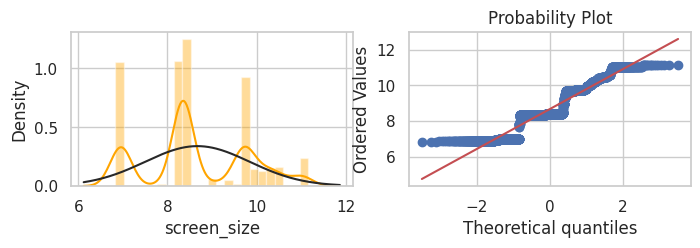

In [ ]:
transformations = ['boxcox','log','reciprocal','sqroot','exp']
for x in transformations:
    trying_different_transformations('screen_size',x)

## Trying different transformations on rear_camera_mp feature

BoxCox - rear_camera_mp
mu  5.868118655203723  sigma  2.021844316861127
Log - rear_camera_mp
mu  2.3169458824941214  sigma  0.47174568909738124
Reciprocal - rear_camera_mp
mu  0.15470240205748986  sigma  0.31482458338046754
Square_Root - rear_camera_mp
mu  3.098470614399081  sigma  0.7381136754691023
Exponential - rear_camera_mp
mu  6.797683005496785  sigma  2.526722482612682


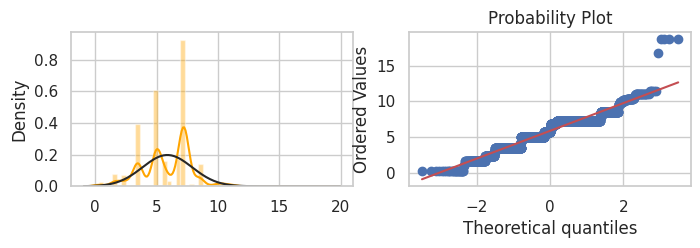

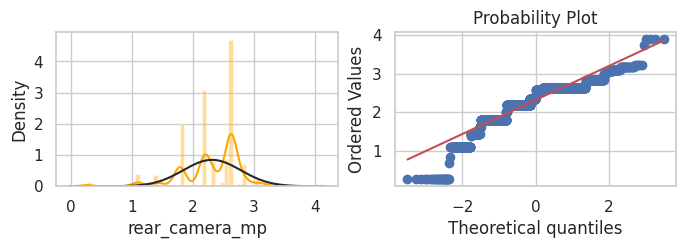

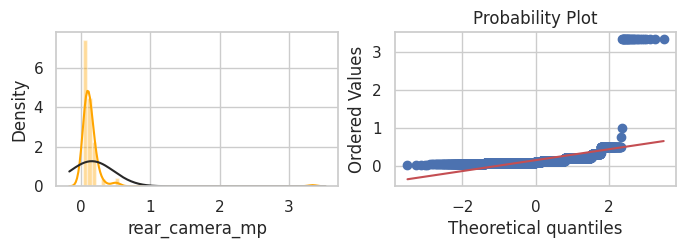

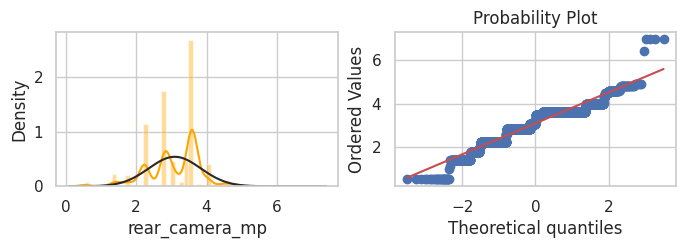

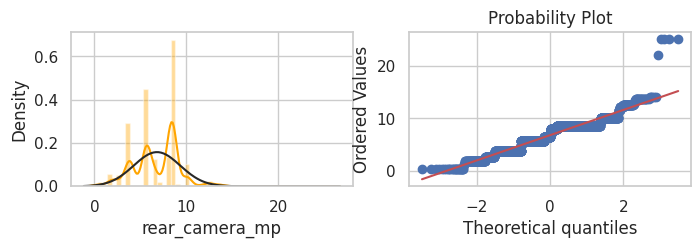

In [ ]:
for x in transformations:
    trying_different_transformations('rear_camera_mp',x)

## Trying different transformations on front_camera_mp feature

BoxCox - front_camera_mp
mu  1.823335563433852  sigma  0.9403148430733964
Log - front_camera_mp
mu  1.7411009005679277  sigma  0.8748472403425439
Reciprocal - front_camera_mp
mu  0.645613262823854  sigma  1.0534448522308344
Square_Root - front_camera_mp
mu  2.3609348821118767  sigma  1.2641636778069432
Exponential - front_camera_mp
mu  4.848009969387257  sigma  4.099663994400645


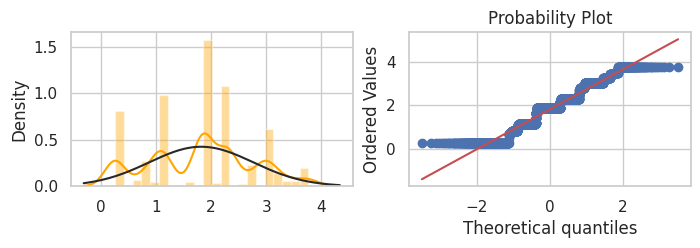

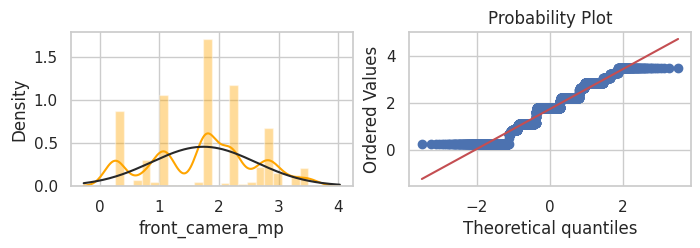

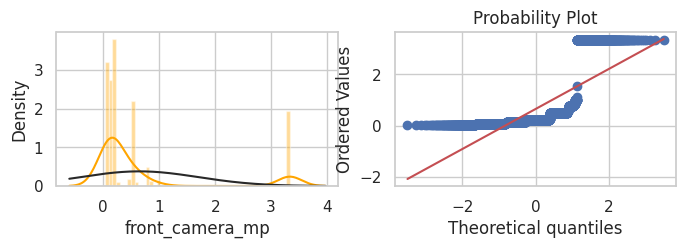

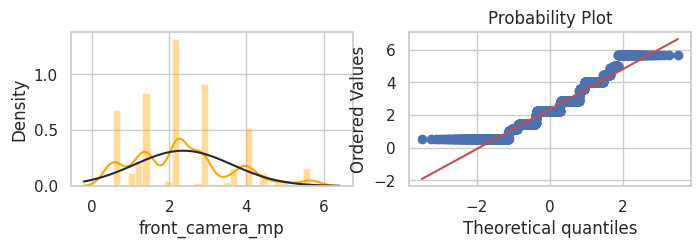

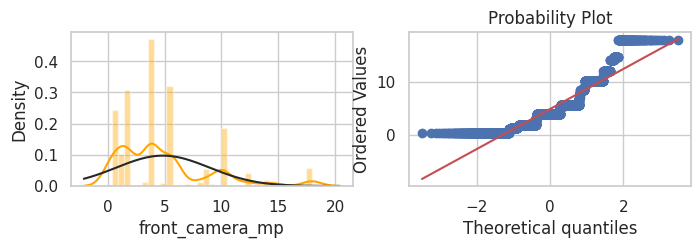

In [ ]:
for x in transformations:
    trying_different_transformations('front_camera_mp',x)

## Trying different transformations on battery feature

BoxCox - battery
mu  38.96626425767086  sigma  4.45429021474748
Log - battery
mu  7.964291605127095  sigma  0.3264154644660827
Reciprocal - battery
mu  0.0003673366452038218  sigma  0.0001278564564460104
Square_Root - battery
mu  54.330676072190876  sigma  8.709600119424522
Exponential - battery
mu  790.4992235944654  sigma  209.36739863499122


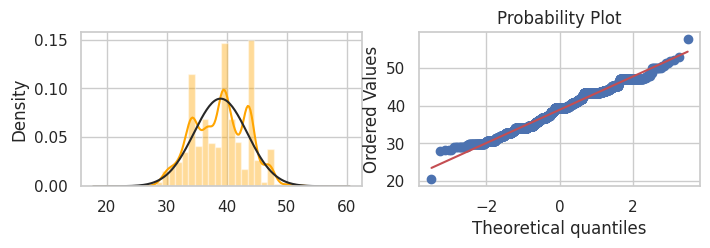

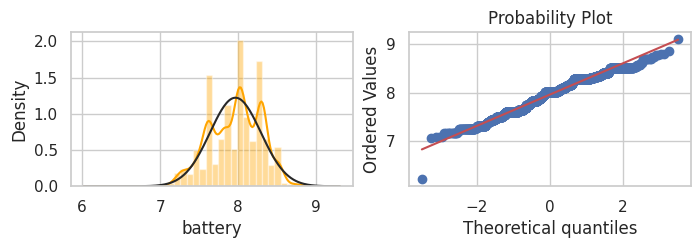

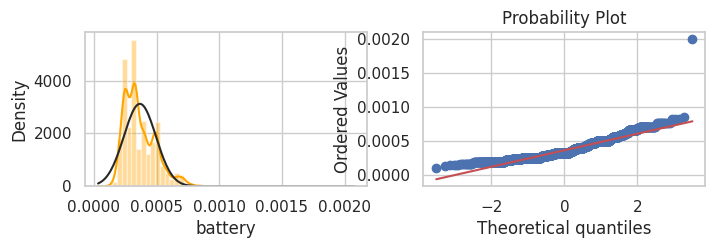

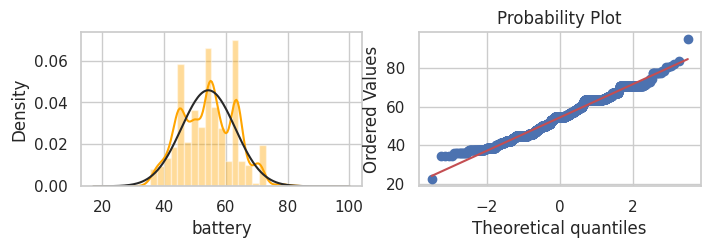

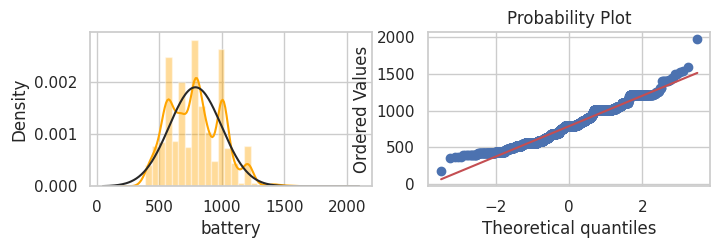

In [ ]:
for x in transformations:
    trying_different_transformations('battery',x)

## Trying different transformations on weight feature

BoxCox - weight
mu  1.0238092929013702  sigma  0.0014225776040320648
Log - weight
mu  5.096892823419643  sigma  0.20930191089558572
Reciprocal - weight
mu  0.006283704828315366  sigma  0.0012342272838872011
Square_Root - weight
mu  12.82068697321765  sigma  1.43431291688309
Exponential - weight
mu  70.70945412745868  sigma  13.87295000129131


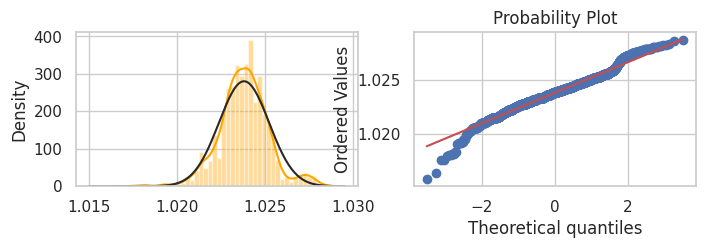

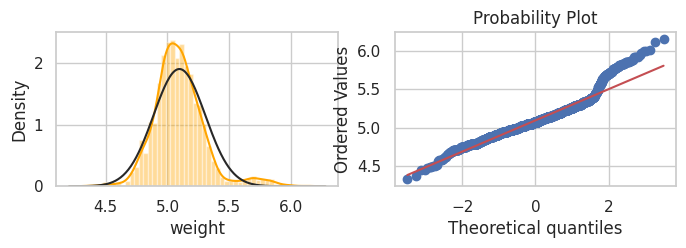

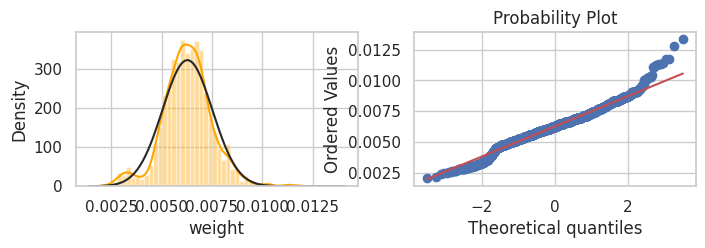

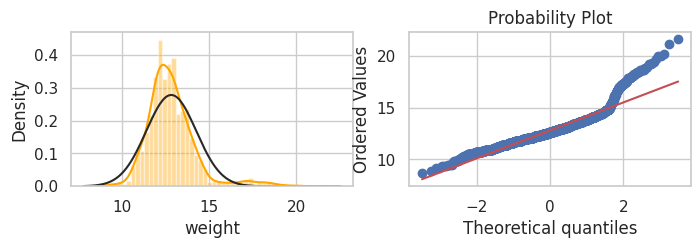

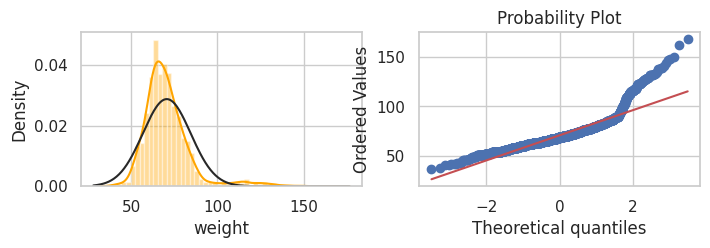

In [ ]:
for x in transformations:
    trying_different_transformations('weight',x)

## Trying different transformations on days_used feature

BoxCox - days_used
mu  1697.9571202310713  sigma  717.1132937792047
Log - days_used
mu  6.408991497916625  sigma  0.48748401386934337
Reciprocal - days_used
mu  0.0019121454187962868  sigma  0.0013491073392392595
Square_Root - days_used
mu  25.290632051535756  sigma  5.342445137545218
Exponential - days_used
mu  223.43464344007447  sigma  72.49666378925575


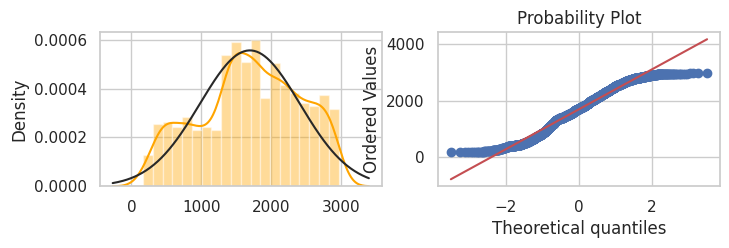

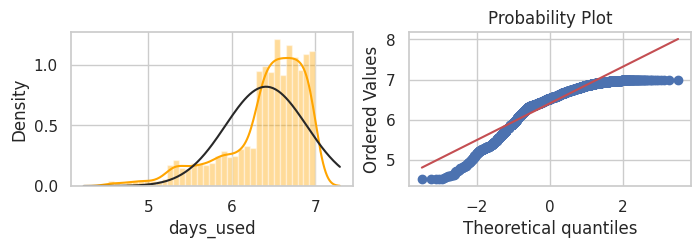

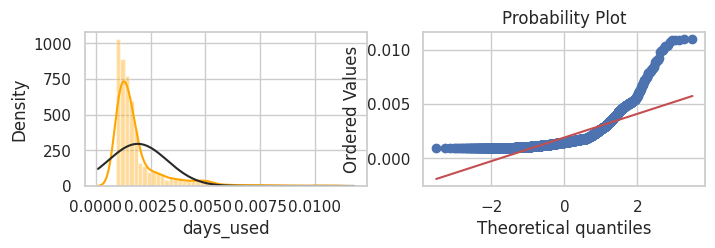

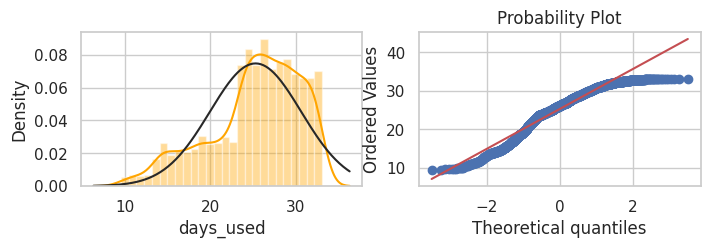

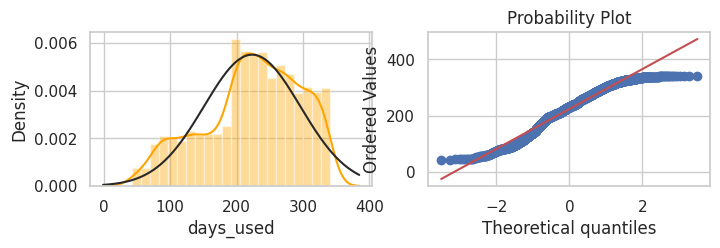

In [ ]:
for x in transformations:
    trying_different_transformations('days_used',x)

## Applying transformations

In [ ]:
def skweness_correction(columnName):    
    if columnName == 'front_camera_mp' or columnName == 'screen_size' or columnName == 'battery'or columnName == 'days_used':
        df_data[columnName], temp_params = boxcox(
        df_data[columnName]+1)
    elif columnName == 'weight':
        df_data[columnName] = 1/df_data[columnName].replace([np.inf, -np.inf], 0)
    elif columnName =='rear_camera_mp':
        df_data[columnName] = df_data[columnName]**(1/2)
    print('''After Correcting''')
    (mu, sigma) = norm.fit(df_data[columnName])
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(8,2))
    plt.subplot(1,2,1)
    sns.distplot(df_data[columnName], fit=norm, color="#b6c1d8")
    plt.title(columnName.upper() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(df_data[columnName], plot = plt)
    plt.show();

After Correcting
Mu after correcting SCREEN_SIZE : 3.3206242652114226, Sigma after correcting SCREEN_SIZE : 0.23339223297510456


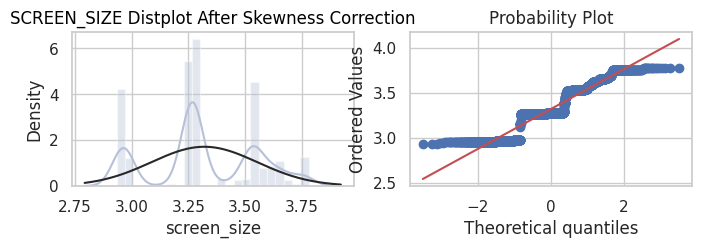

After Correcting
Mu after correcting REAR_CAMERA_MP : 3.098470614399081, Sigma after correcting REAR_CAMERA_MP : 0.7381136754691023


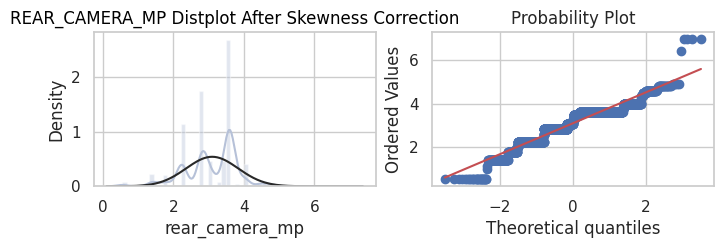

After Correcting
Mu after correcting FRONT_CAMERA_MP : 1.823335563433852, Sigma after correcting FRONT_CAMERA_MP : 0.9403148430733964


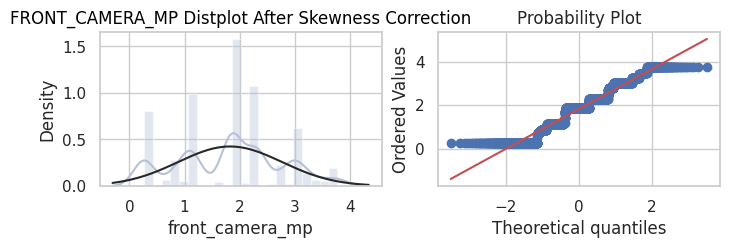

After Correcting
Mu after correcting BATTERY : 38.96626425767086, Sigma after correcting BATTERY : 4.45429021474748


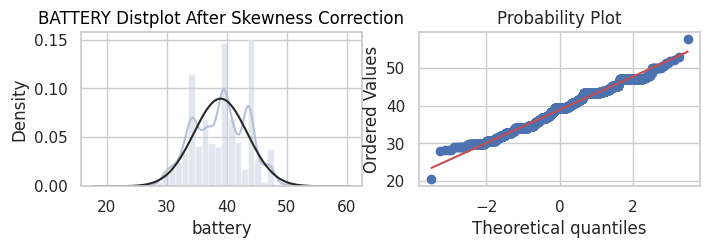

After Correcting
Mu after correcting WEIGHT : 0.006283704828315366, Sigma after correcting WEIGHT : 0.0012342272838872011


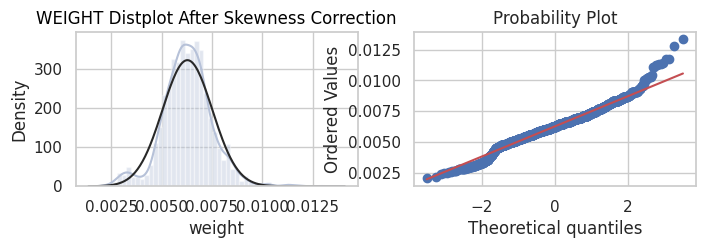

After Correcting
Mu after correcting DAYS_USED : 1697.9571202310713, Sigma after correcting DAYS_USED : 717.1132937792047


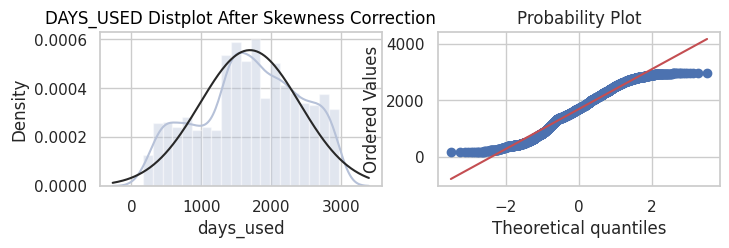

In [ ]:
skewColumnList1 = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used']
for columns in skewColumnList1:
    skweness_correction(columns)

# Encoding categorical features

In [ ]:
df_data = df_data.drop(['os','device_brand'],axis=1)

In [ ]:
df_data.head()

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  ram  \
0     3.450975   1   0        3.605551         1.860664             64.0  3.0   
1     3.713462   1   1        3.605551         3.008062            128.0  8.0   
2     3.659299   1   1        3.605551         2.301439            128.0  8.0   
3     3.531705   1   0        3.605551         2.301439             64.0  3.0   
4     3.617411   1   0        3.605551         2.301439             64.0  4.0   

     battery    weight  release_year   days_used  normalized_used_price  \
0  39.406606  0.006849          2020  243.172521               4.307572   
1  44.638354  0.004695          2020  723.878215               5.162097   
2  44.270736  0.004695          2020  322.493725               5.111084   
3  47.063510  0.005405          2020  641.733858               4.389995   
4  43.517498  0.005682          2020  467.336298               4.413889   

   normalized_new_price  Device_Brand  
0              4.715100      4.683326  
1              5.519018      4.683326  
2              5.884631      4.683326  
3              4.947837      4.683326  
4              5.060694      4.683326

In [ ]:
dummies_year = pd.get_dummies(df_data['release_year'],drop_first=True)
df_data = pd.concat([df_data,dummies_year],axis=1)
df_data = df_data.drop('release_year',axis=1)

In [ ]:
df_data.head()

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  ram  \
0     3.450975   1   0        3.605551         1.860664             64.0  3.0   
1     3.713462   1   1        3.605551         3.008062            128.0  8.0   
2     3.659299   1   1        3.605551         2.301439            128.0  8.0   
3     3.531705   1   0        3.605551         2.301439             64.0  3.0   
4     3.617411   1   0        3.605551         2.301439             64.0  4.0   

     battery    weight   days_used  normalized_used_price  \
0  39.406606  0.006849  243.172521               4.307572   
1  44.638354  0.004695  723.878215               5.162097   
2  44.270736  0.004695  322.493725               5.111084   
3  47.063510  0.005405  641.733858               4.389995   
4  43.517498  0.005682  467.336298               4.413889   

   normalized_new_price  Device_Brand  2014  2015  2016  2017  2018  2019  \
0              4.715100      4.683326     0     0     0     0     0     0   
1              5.519018      4.683326     0     0     0     0     0     0   
2              5.884631      4.683326     0     0     0     0     0     0   
3              4.947837      4.683326     0     0     0     0     0     0   
4              5.060694      4.683326     0     0     0     0     0     0   

   2020  
0     1  
1     1  
2     1  
3     1  
4     1

In [ ]:
Y = df_data['normalized_used_price']
X = df_data.loc[:, df_data.columns != 'normalized_used_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [ ]:
X_train.head()

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  \
529      2.975769   1   0        3.605551         1.158622             32.0   
971      3.265949   1   0        4.000000         3.008062             64.0   
1451     3.280353   1   0        3.605551         1.860664             32.0   
2197     3.755029   0   0        1.414214         1.124265             32.0   
1342     3.523981   1   0        3.605551         1.860664             32.0   

      ram    battery    weight    days_used  normalized_new_price  \
529   4.0  36.316834  0.006250  2637.732659              5.068590   
971   4.0  37.366672  0.007042  2241.466649              5.348345   
1451  4.0  39.313941  0.006135  2105.448559              5.522221   
2197  4.0  41.931599  0.003226  1465.097917              5.001796   
1342  4.0  40.662737  0.005882  1769.445911              5.079913   

      Device_Brand  2014  2015  2016  2017  2018  2019  2020  
529       4.210719     1     0     0     0     0     0     0  
971       4.432937     0     0     0     1     0     0     0  
1451      4.322144     0     1     0     0     0     0     0  
2197      4.510090     1     0     0     0     0     0     0  
1342      4.423648     1     0     0     0     0     0     0

In [ ]:
X_train.columns

Index([         'screen_size',                   '4g',                   '5g',
             'rear_camera_mp',      'front_camera_mp',      'internal_memory',
                        'ram',              'battery',               'weight',
                  'days_used', 'normalized_new_price',         'Device_Brand',
                         2014,                   2015,                   2016,
                         2017,                   2018,                   2019,
                         2020],
      dtype='object')

# Scaling features

In [ ]:
sc=StandardScaler()
X_train.iloc[:,[0,3,4,5,6,7,8,9,10,11]]=sc.fit_transform(X_train.iloc[:,[0,3,4,5,6,7,8,9,10,11]])
X_test.iloc[:,[0,3,4,5,6,7,8,9,10,11]]=sc.fit_transform(X_test.iloc[:,[0,3,4,5,6,7,8,9,10,11]])

In [ ]:
X_train.shape[0]

2102

In [ ]:
X_test.shape[0]

902

In [ ]:
X_train.head()

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  \
529     -1.475247   1   0        0.692684        -0.697723        -0.265863   
971     -0.230808   1   0        1.219604         1.257347         0.139273   
1451    -0.169038   1   0        0.692684         0.044417        -0.265863   
2197     1.866612   0   0       -2.234592        -0.734042        -0.265863   
1342     0.875762   1   0        0.692684         0.044417        -0.265863   

           ram   battery    weight  days_used  normalized_new_price  \
529  -0.134983 -0.591740 -0.038620   1.312312             -0.333539   
971  -0.134983 -0.356381  0.604446   0.759582              0.118927   
1451 -0.134983  0.080169 -0.131989   0.569858              0.400147   
2197 -0.134983  0.667010 -2.493334  -0.323333             -0.441568   
1342 -0.134983  0.382549 -0.337036   0.101186             -0.315226   

      Device_Brand  2014  2015  2016  2017  2018  2019  2020  
529      -0.676533     1     0     0     0     0     0     0  
971       0.078712     0     0     0     1     0     0     0  
1451     -0.297837     0     1     0     0     0     0     0  
2197      0.340930     1     0     0     0     0     0     0  
1342      0.047143     1     0     0     0     0     0     0

# Linear Regression Model

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train.values, y_train)

X_test_Prediction = linear_model.predict(X_test.values)
print("MSE : ",mean_squared_error(y_test,X_test_Prediction))
print("R2 Score : ",r2_score(y_test,X_test_Prediction))
linear_model_score=r2_score(y_test,X_test_Prediction)
linear_model_ms=mean_squared_error(y_test,X_test_Prediction)

MSE :  0.04918576917229624
R2 Score :  0.7980215819414165


In [ ]:
from sklearn.model_selection import cross_val_score

linear_model_cval = cross_val_score(linear_model, X_train.values, y_train, scoring="neg_mean_squared_error", cv=5)
mean_linear_model_cval = np.mean(linear_model_cval)
print(mean_linear_model_cval)

-0.04874108284588072


# Ridge Regression Model

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train.values,y_train)
X_test_pred_ridge = ridge_model.predict(X_test.values)
print("MSE : ",mean_squared_error(y_test,X_test_pred_ridge))
print("R2 Score : ",r2_score(y_test,X_test_pred_ridge))
ridge_model_score=r2_score(y_test,X_test_pred_ridge)
ridge_model_ms=mean_squared_error(y_test,X_test_pred_ridge)

MSE :  0.04917818900297071
R2 Score :  0.7980527094531897


In [ ]:
ridge_model_cval = cross_val_score(ridge_model,X_train.values,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_ridge = np.mean(ridge_model_cval)
print(mean_cross_ridge)

-0.04872818280867379


# Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train.values, y_train)
X_test_pred_lasso = lasso_model.predict(X_test.values)
print("MSE: ", mean_squared_error(y_test, X_test_pred_lasso))
print("R2 Score: ", r2_score(y_test, X_test_pred_lasso))
lasso_model_score = r2_score(y_test, X_test_pred_lasso)
lasso_model_ms =  mean_squared_error(y_test, X_test_pred_lasso)

MSE:  0.06517730732008427
R2 Score:  0.7323532873967218


In [ ]:
lasso_model_cval = cross_val_score(lasso_model, X_train.values, y_train, scoring="neg_mean_squared_error", cv=5)
mean_cross_lasso = np.mean(lasso_model_cval)
print(mean_cross_lasso)

-0.06784479210319486


# SVM Regressor

In [ ]:
svmreg_model = SVR()
svmreg_model.fit(X_train.values,y_train)
X_test_pred_svmreg = svmreg_model.predict(X_test.values)
print("MSE : ",mean_squared_error(y_test,X_test_pred_svmreg))
print("R2 Score : ",r2_score(y_test,X_test_pred_svmreg))
svm_model_score=r2_score(y_test,X_test_pred_svmreg)
svm_model_ms=mean_squared_error(y_test,X_test_pred_svmreg)

MSE :  0.05236392525998193
R2 Score :  0.7849706741334002


In [ ]:
svm_model_cval = cross_val_score(svmreg_model,X_train.values,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_svmreg = np.mean(svm_model_cval)
print(mean_cross_svmreg)

-0.05570109904475908


# DecisionTree Regressor

In [ ]:
dtree_model = DecisionTreeRegressor(max_depth=10)
dtree_model.fit(X_train.values,y_train)
X_test_pred_dtree = dtree_model.predict(X_test.values)
print("MSE : ",mean_squared_error(y_test,X_test_pred_dtree))
print("R2 Score : ",r2_score(y_test,X_test_pred_dtree))
dtree_model_score=r2_score(y_test,X_test_pred_dtree)
dtree_model_ms=mean_squared_error(y_test,X_test_pred_dtree)

MSE :  0.08134964467965777
R2 Score :  0.6659425517070131


In [ ]:
dtree_model_cval = cross_val_score(dtree_model,X_train.values,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_dtree = np.mean(dtree_model_cval)
print(mean_cross_dtree)

-0.08192364162916503


# RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rfr_model = RandomForestRegressor()
grid_search = GridSearchCV(rfr_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train.values, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)  

Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best Score:  0.8057928655364643


In [ ]:
X_test_pred_rfr = grid_search.best_estimator_.predict(X_test.values)
print("MSE : ",mean_squared_error(y_test,X_test_pred_rfr))
print("R2 Score : ",r2_score(y_test,X_test_pred_rfr))
rfr_model_score=r2_score(y_test,X_test_pred_rfr)
rfr_model_ms=mean_squared_error(y_test,X_test_pred_rfr)

MSE :  0.047522199822292444
R2 Score :  0.8048529299369617


In [ ]:
rfr_model_cval = cross_val_score(rfr_model,X_train.values,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_rfr = np.mean(rfr_model_cval)
print(mean_cross_rfr)

-0.05106489348854117


# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=11)
knn_model.fit(X_train.values, y_train)
X_test_pred_knn = knn_model.predict(X_test.values)
print("MSE: ", mean_squared_error(y_test, X_test_pred_knn))
print("R2 Score: ", r2_score(y_test, X_test_pred_knn))
knn_model_score = r2_score(y_test, X_test_pred_knn)
knn_model_ms = mean_squared_error(y_test, X_test_pred_knn)

MSE:  0.055200459171032015
R2 Score:  0.7733226173526572


In [ ]:
cross_knn = cross_val_score(knn_model, X_train.values, y_train, scoring="neg_mean_squared_error", cv=5)
mean_cross_knn = np.mean(cross_knn)
print(mean_cross_knn)
knn_model_cval = cross_val_score(knn_model, X_train.values, y_train, scoring="neg_mean_squared_error", cv=5)

-0.05894896178692095


# Voting

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=5)
knn_model = KNeighborsRegressor(n_neighbors=11)

voting_model = VotingRegressor([('lr', linear_model), ('dt', tree_model), ('knn', knn_model)])
voting_model.fit(X_train.values, y_train)
X_test_pred_voting = voting_model.predict(X_test.values)
print("MSE: ", mean_squared_error(y_test, X_test_pred_voting))
print("R2 Score: ", r2_score(y_test, X_test_pred_voting))
voting_model_score = r2_score(y_test, X_test_pred_voting)
voting_model_ms= mean_squared_error(y_test, X_test_pred_voting)

MSE:  0.04810675001006794
R2 Score:  0.8024525095676236


In [ ]:
voting_model_cval = cross_val_score(voting_model, X_train.values, y_train, scoring="neg_mean_squared_error", cv=5)
mean_cross_voting = np.mean(voting_model_cval)
print(mean_cross_voting)

-0.04923412571090144


# XGBoost

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train.values, y_train)
X_test_pred_xgb = xgb_model.predict(X_test.values)
print("MSE : ",mean_squared_error(y_test, X_test_pred_xgb))
print("R2 Score : ", r2_score(y_test, X_test_pred_xgb))
xgb_model_score = r2_score(y_test, X_test_pred_xgb)
xgb_model_ms = mean_squared_error(y_test, X_test_pred_xgb)

MSE :  0.052791960165303284
R2 Score :  0.7832129744063141


In [ ]:
xgb_model_cval = cross_val_score(xgb_model, X_train.values, y_train, scoring="neg_mean_squared_error", cv=5)
mean_cross_xgb = np.mean(xgb_model_cval)
print(mean_cross_xgb)

-0.05949812566339789


# Tensorflow NN

In [ ]:
import tensorflow as tf

tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

tf_model.compile(optimizer='adam', loss='mean_squared_error')
tf_model.fit(X_train.values, y_train, epochs=300, batch_size=16, verbose=0)
X_test_pred_tf = tf_model.predict(X_test.values)
print("MSE : ",mean_squared_error(y_test, X_test_pred_tf))
print("R2 Score : ", r2_score(y_test, X_test_pred_tf))
tf_model_score = r2_score(y_test, X_test_pred_tf)
tf_model_ms = mean_squared_error(y_test, X_test_pred_tf)

29/29 [==============================] - 0s 2ms/step
MSE :  0.068272611347179
R2 Score :  0.7196426066180406


# Comparing R2 score of models

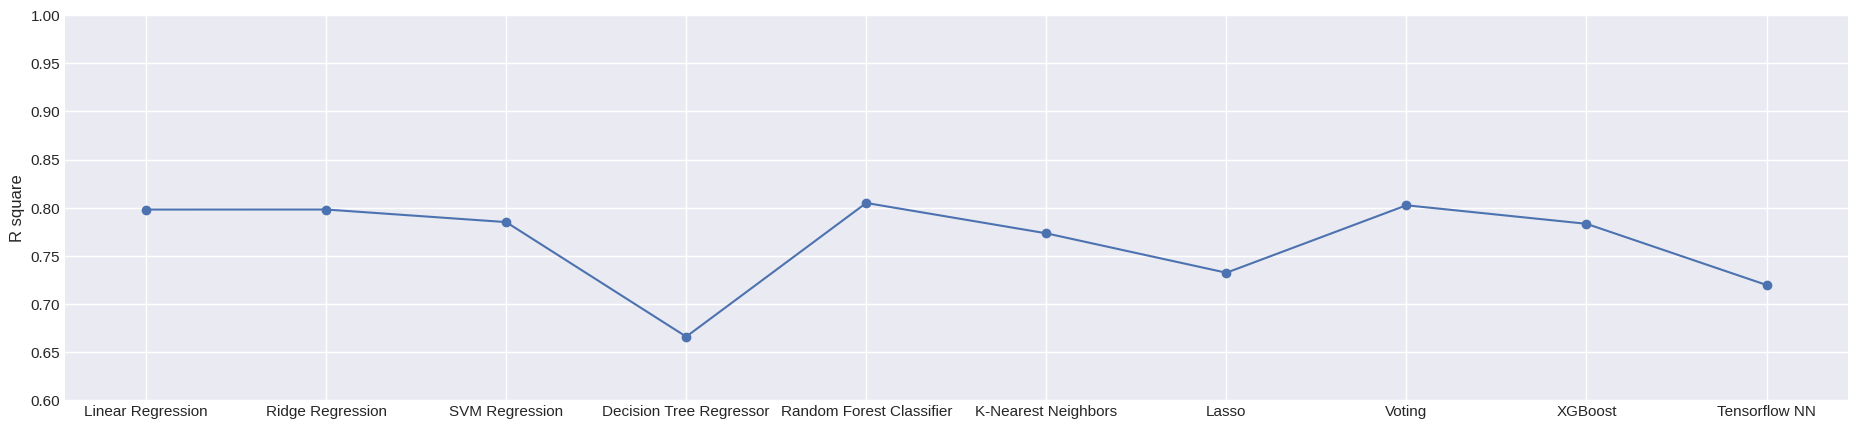

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(23, 5))
models = ['Linear Regression', 'Ridge Regression','SVM Regression','Decision Tree Regressor',"Random Forest Classifier","K-Nearest Neighbors","Lasso","Voting","XGBoost","Tensorflow NN"]
test_accuracy = [linear_model_score, ridge_model_score,svm_model_score,dtree_model_score,rfr_model_score,knn_model_score,lasso_model_score,voting_model_score,xgb_model_score,tf_model_score]
plt.plot(models, test_accuracy, '-o')
plt.ylim(0.60, 1)
plt.ylabel("R square")
plt.show();

# Comparing Mean square error of the models

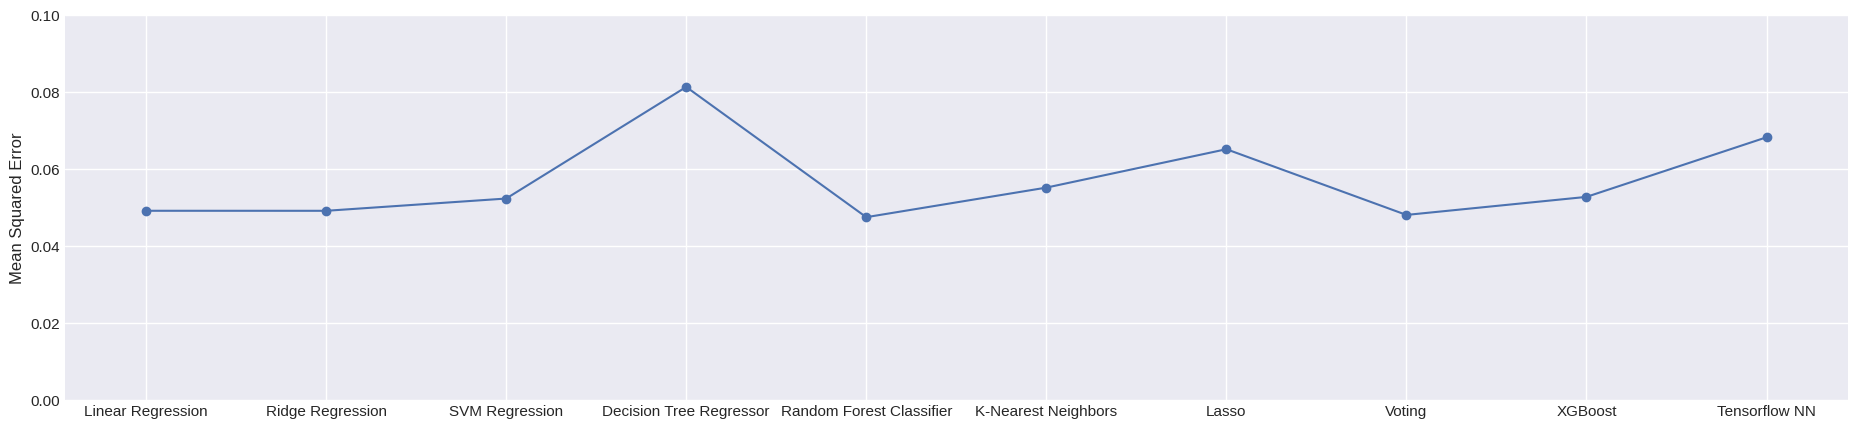

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(23, 5))
models = ['Linear Regression', 'Ridge Regression','SVM Regression','Decision Tree Regressor',"Random Forest Classifier","K-Nearest Neighbors","Lasso","Voting","XGBoost","Tensorflow NN"]
test_accuracy = [linear_model_ms, ridge_model_ms,svm_model_ms,dtree_model_ms,rfr_model_ms,knn_model_ms,lasso_model_ms,voting_model_ms,xgb_model_ms,tf_model_ms]
plt.plot(models, test_accuracy, '-o')
plt.ylim(0.0, 0.1)
plt.ylabel("Mean Squared Error")
plt.show();